# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

# 2020-09-06T1846Z default API https://coronavirus-tracker-api.herokuapp.com/v2 down, alternative https://covid-tracker-us.herokuapp.com/v2 up
covid19 = COVID19Py.COVID19('https://covid-tracker-us.herokuapp.com')
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('72a3f4db.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-11-03T0101Z data: 72a3f4db.pkl
    # 2020-10-28T1139Z data: 7c322f53.pkl
    # 2020-10-21T1343Z data: 173b7204.pkl
    # 2020-10-14T1146Z data: 1678e786.pkl
    # 2020-10-02T0750Z data: 6034799e.pkl
    # 2020-09-06T1848Z data: e3e48d96.pkl
    # 2020-07-30T1354Z data: c6b11935.pkl
    # 2020-07-15T1438Z data: 02afa4cd.pkl
    # 2020-06-22T1249Z data: 2fa5652b.pkl
    # 2020-06-20T0529Z data: 30a2be6c.pkl
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-11-03T00:49:36.316521Z   
1  2020-11-03T00:49:36.369529Z   
2  2020-11-03T00:49:36.403990Z   
3  2020-11-03T00:49:36.449952Z   
4  2020-11-03T00:49:36.505194Z   

                                         coordinates  \
0  {'latitude': '33.93911', 'longitude': '67.7099...   
1    {'latitude': '41.1533', 'longitude': '20.1683'}   
2     {'latitude': '28.0339', 'longitude': '1.6596'}   
3     {'latitude': '42.5063', 'longitude': '1.5218'}   
4   {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 41501, 'deaths': 1536, 'recovere...   
1  {'confirmed': 21202, 'deaths': 518, 'recovered...   
2  {'confirmed': 58272, 'deaths': 1973, 'recovere...   
3  {'confirmed': 4825, 'deaths': 75, 'recovered':...   
4  {'confirmed': 11035, 'deaths': 286, 'recovered...   

                                           timelines  
0  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
1  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
2  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
3  {'confirmed': {'timeline': {'2020-01-22T00:00:...  
4  {'confirmed': {'timeline': {'2020-01-22T00:00:...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
280      26271     462       NaN                     0.478085   
281      26385     463       NaN                     0.433939   
282      26511     464       NaN                     0.477544   
283      26635     466       NaN                     0.467730   
284      26732     468       NaN                     0.364182   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
280                                        3095.374691                 
281                                        2809.549694                 
282                                        3091.874929                 
283                                        3028.335911                 
284                                        2357.911520                 

     deaths_percentage_change  \
280                  0.216920   
281                  0.216450   
282                  0.215983   
283                  0.431034   
284                  0.429185   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
280                                        1404.454085           
281                                        1401.414141           
282                                        1398.387329           
283                                        2790.747126           
284                                        2778.769671           

     confirmed_new_cases  deaths_new_cases  
280                125.0               1.0  
281                114.0               1.0  
282                126.0               1.0  
283                124.0               2.0  
284                 97.0               2.0

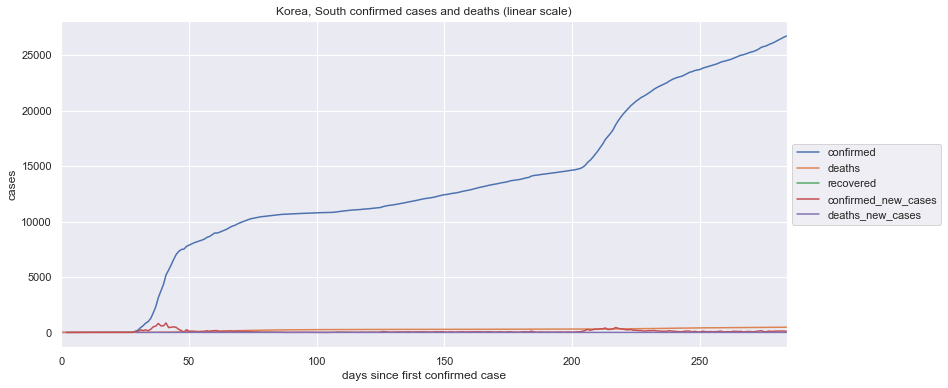

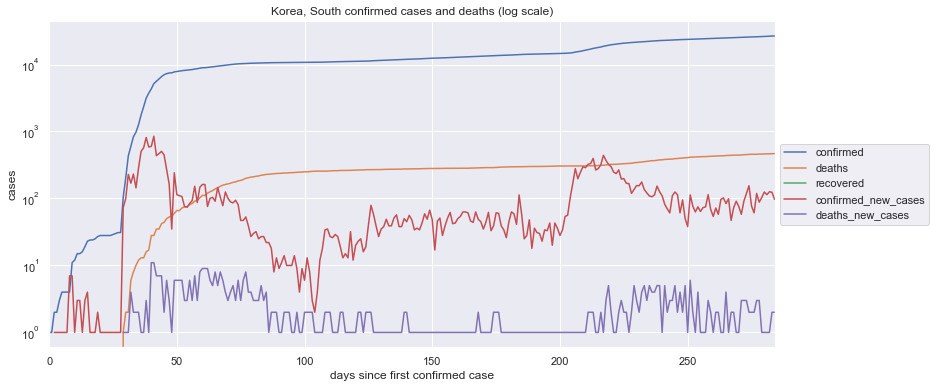

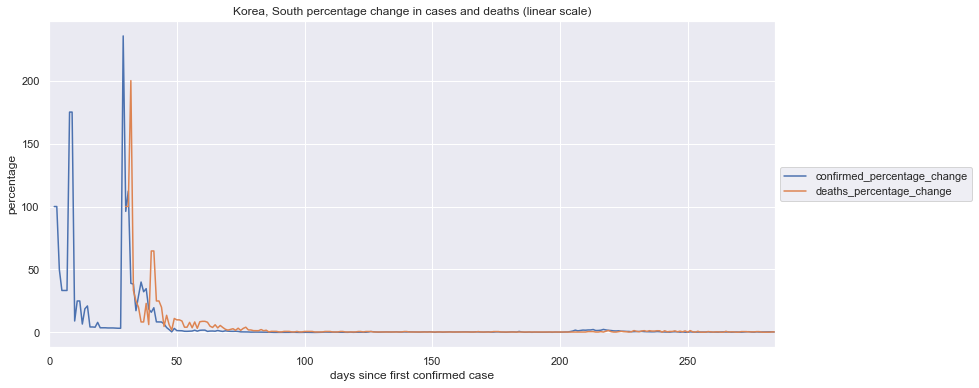

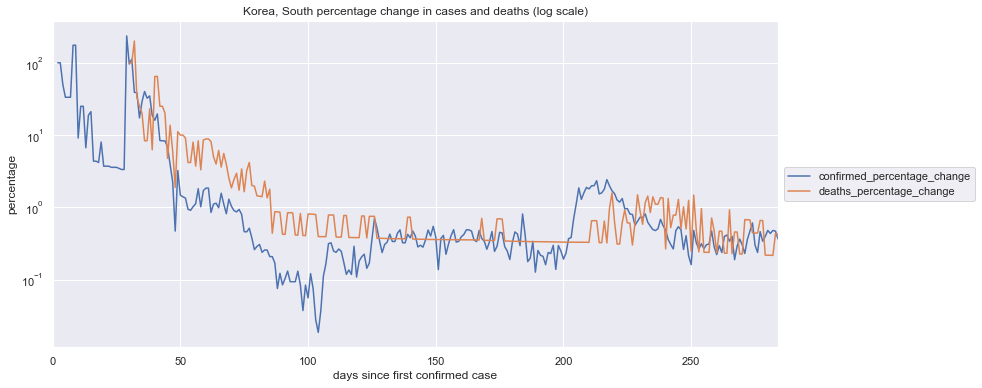

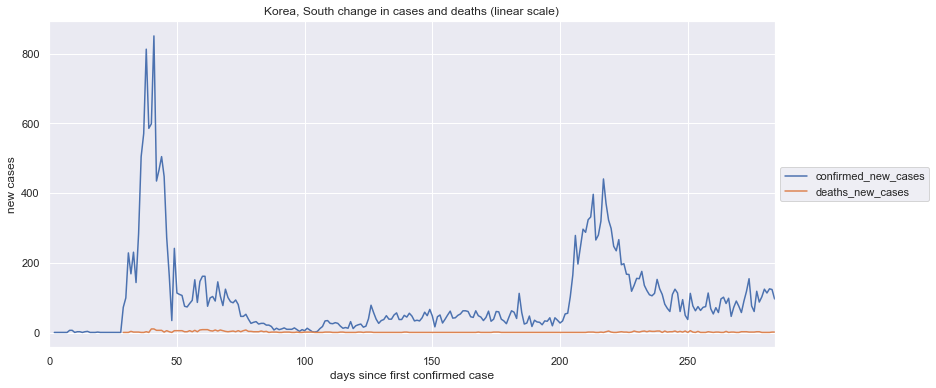

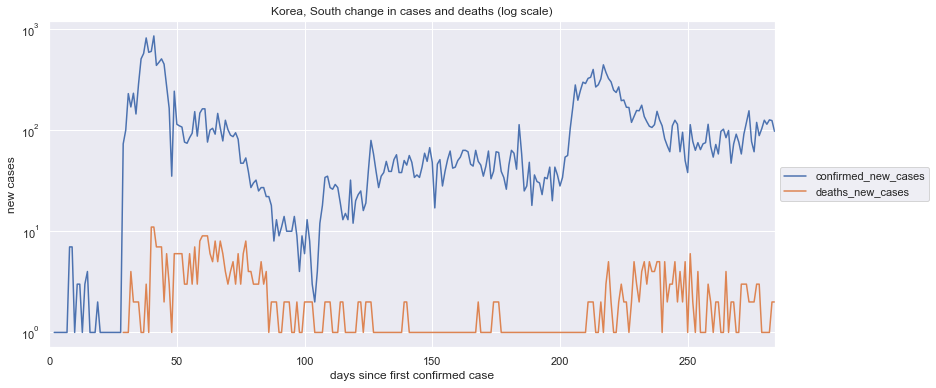

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths  recovered  confirmed_percentage_change  \
267     368337   11170      23969                     6.060658   
268     392258   11308      24443                     6.494324   
269     412314   11452      24906                     5.112961   
270     429229   11625      25569                     4.102456   
271     441018   11737      25819                     2.746553   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
267                                      206480.380123                 
268                                      221254.935996                 
269                                      174193.319359                 
270                                      139766.440345                 
271                                       93572.211737                 

     deaths_percentage_change  \
267                  1.195869   
268                  1.235452   
269                  1.273435   
270                  1.510653   
271                  0.963441   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
267                                       40742.016956           
268                                       42090.578712           
269                                       43384.607823           
270                                       51466.394838           
271                                       32823.436242           

     confirmed_new_cases  deaths_new_cases  
267              21048.0             132.0  
268              23921.0             138.0  
269              20056.0             144.0  
270              16915.0             173.0  
271              11789.0             112.0

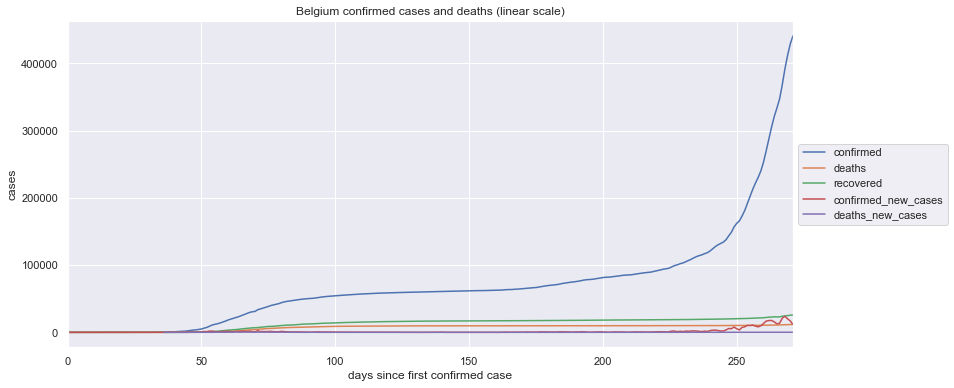

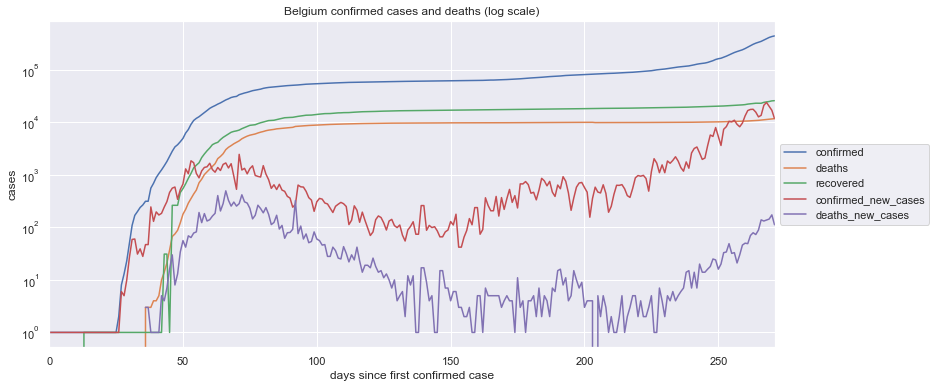

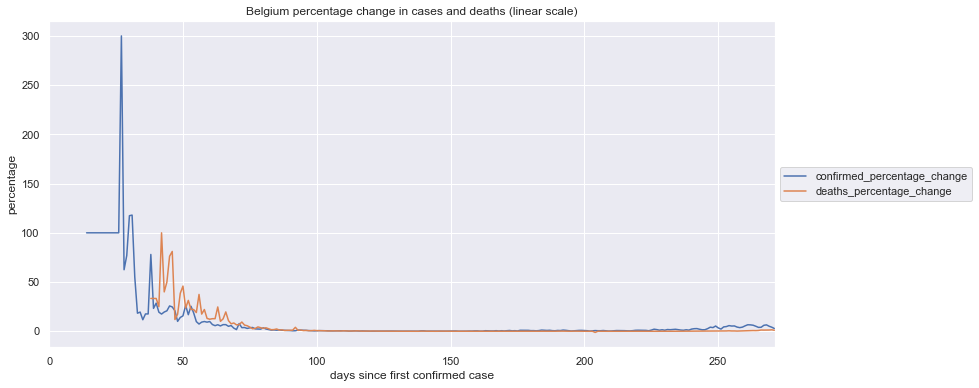

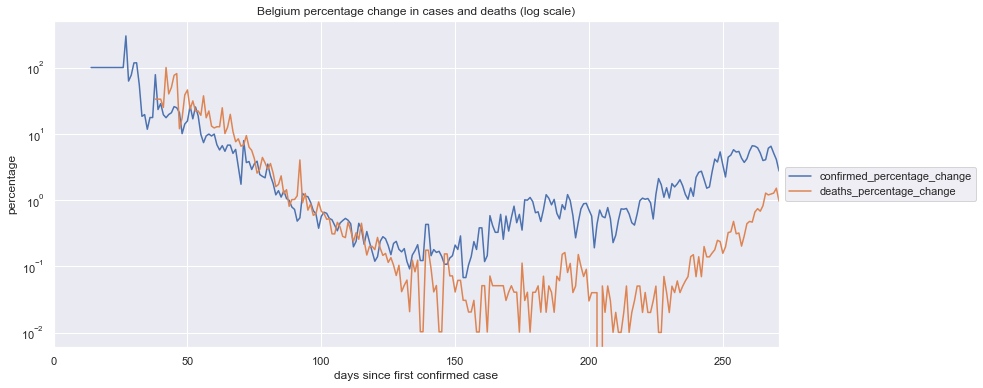

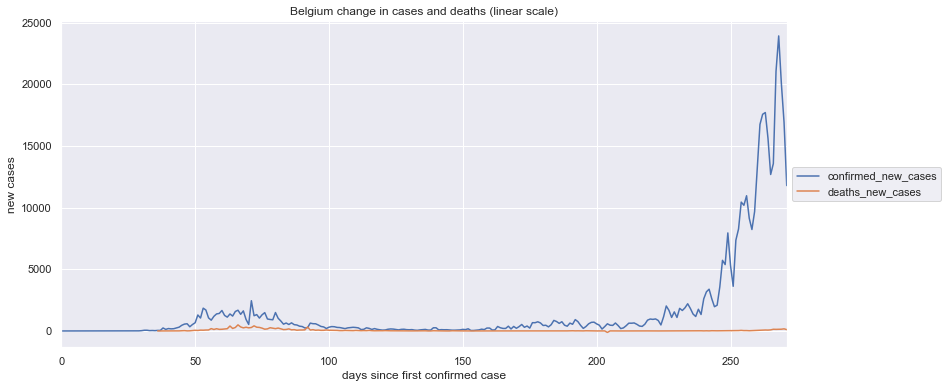

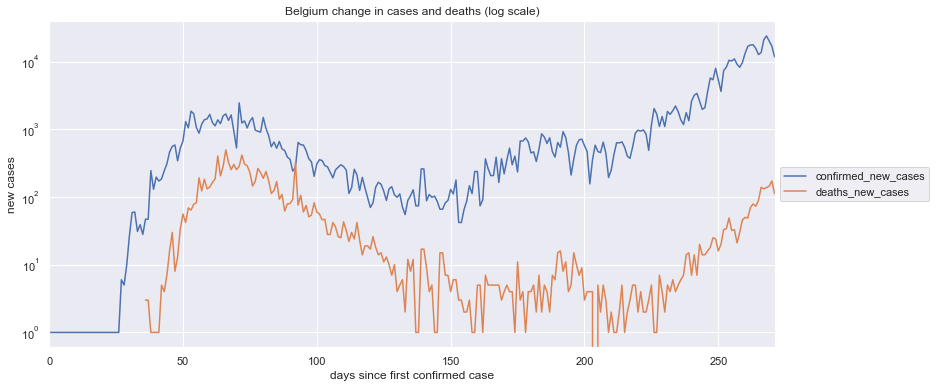

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
246     135658    2158       NaN                     6.782009   
247     145044    2200       NaN                     6.918870   
248     154251    2277       NaN                     6.347729   
249     154251    2297       NaN                          NaN   
250     154251    2326       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
246                                      109996.953448                 
247                                      112216.683326                 
248                                      102953.392901                 
249                                                NaN                 
250                                                NaN                 

     deaths_percentage_change  \
246                  0.512343   
247                  1.946247   
248                  3.500000   
249                  0.878349   
250                  1.262516   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
246                                        8309.653780           
247                                       31566.042632           
248                                       56766.266667           
249                                       14245.879081           
250                                       20476.668118           

     confirmed_new_cases  deaths_new_cases  
246               8616.0              11.0  
247               9386.0              42.0  
248               9207.0              77.0  
249                  NaN              20.0  
250                  NaN              29.0

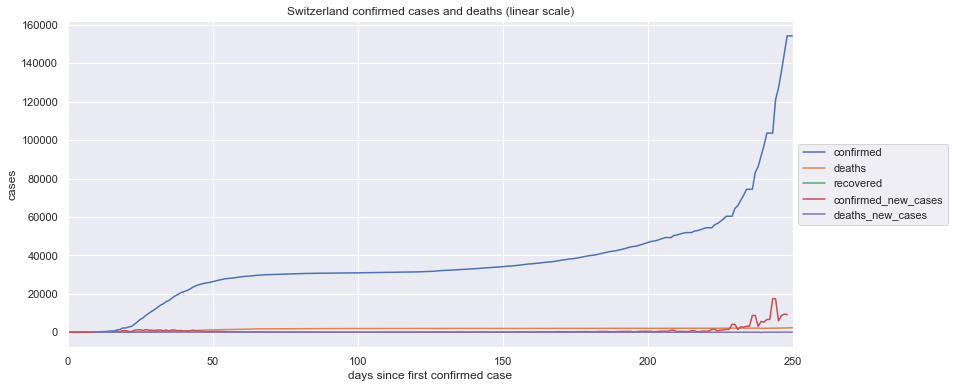

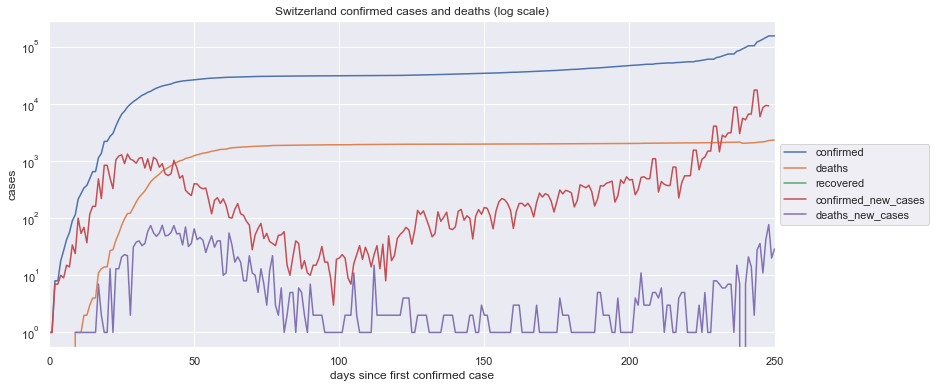

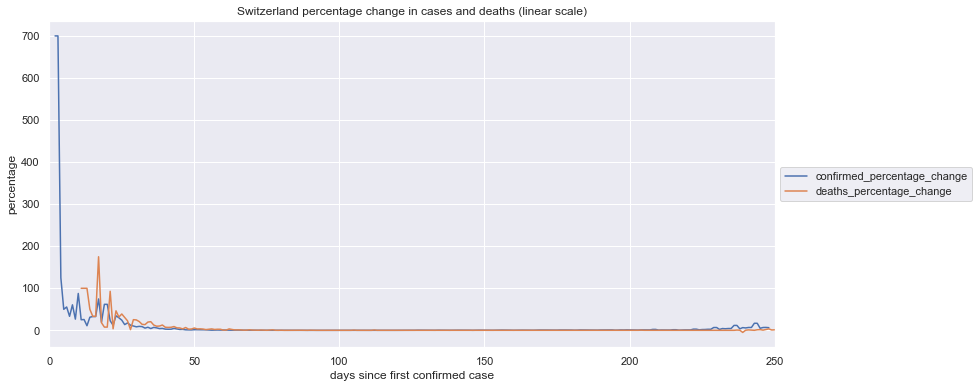

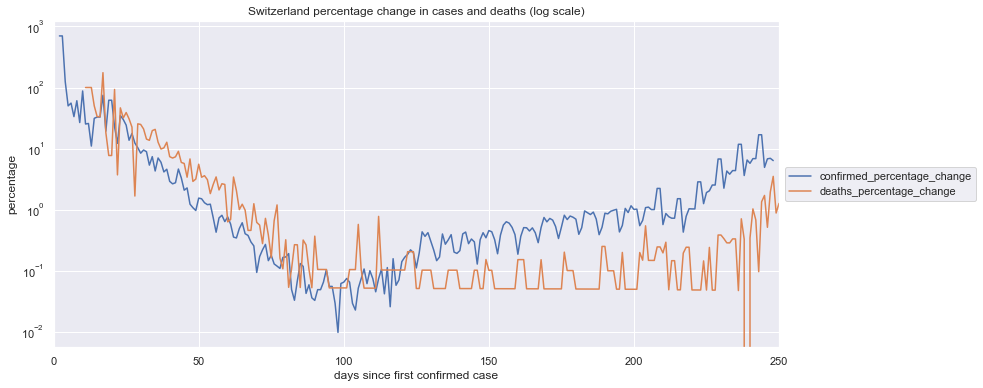

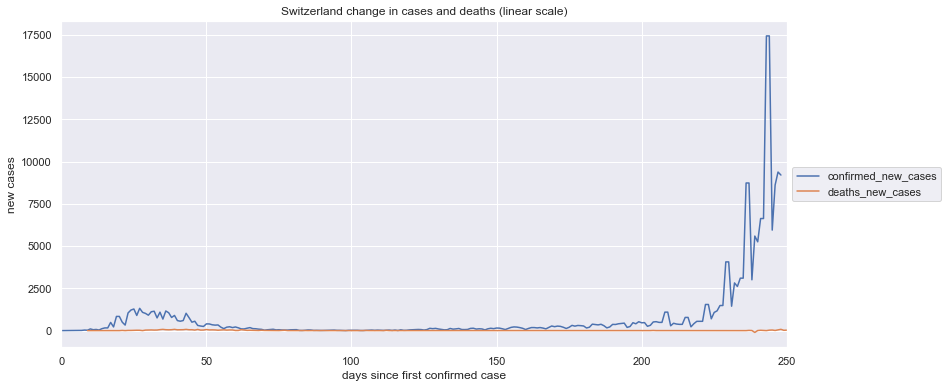

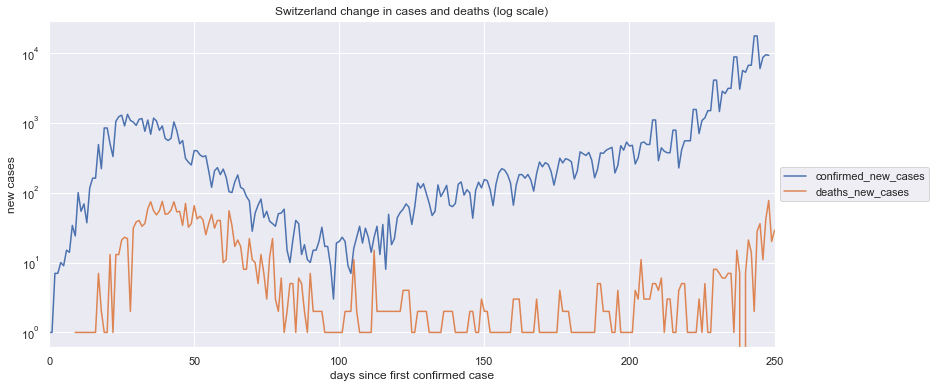

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
245      34299     603       NaN                     4.723376   
246      35510     615       NaN                     3.530715   
247      37196     620       NaN                     4.747958   
248      39251     626       NaN                     5.524788   
249      40929     635       NaN                     4.275050   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
245                                       15501.058267                 
246                                       11587.014362                 
247                                       15581.733003                 
248                                       18131.112287                 
249                                       14029.755130                 

     deaths_percentage_change  \
245                  1.686341   
246                  1.990050   
247                  0.813008   
248                  0.967742   
249                  1.437700   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
245                                        5534.191296           
246                                        6530.896395           
247                                        2668.110113           
248                                        3175.911715           
249                                        4718.207500           

     confirmed_new_cases  deaths_new_cases  
245               1547.0              10.0  
246               1211.0              12.0  
247               1686.0               5.0  
248               2055.0               6.0  
249               1678.0               9.0

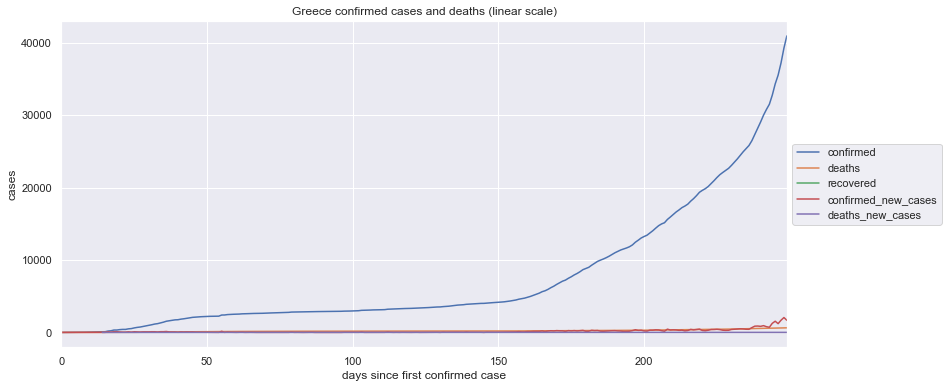

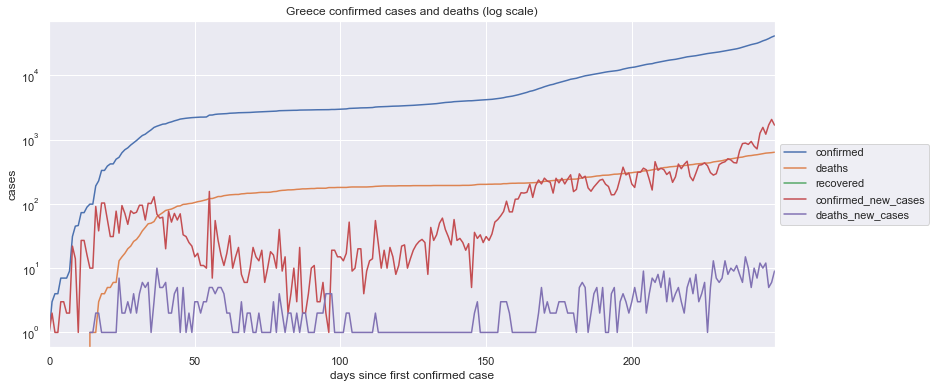

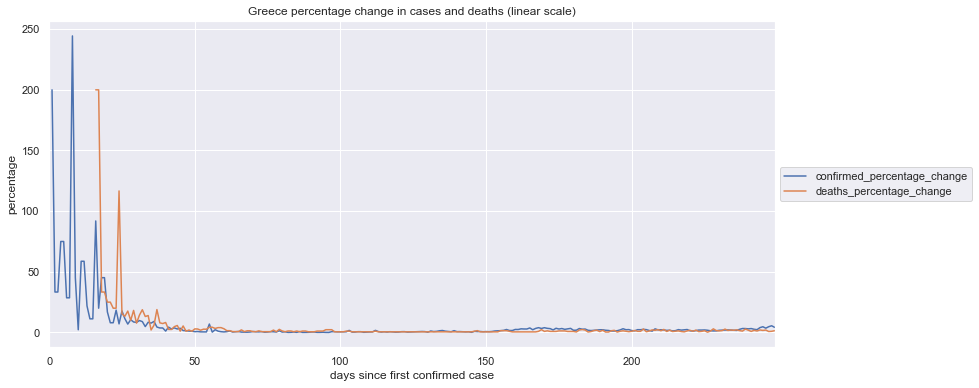

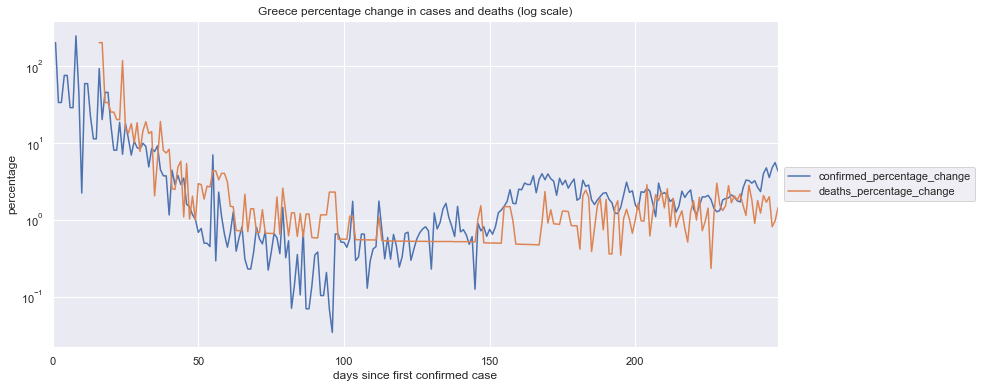

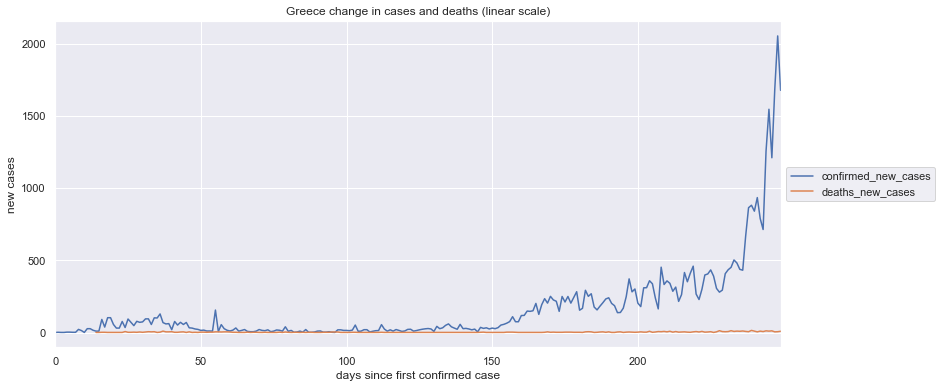

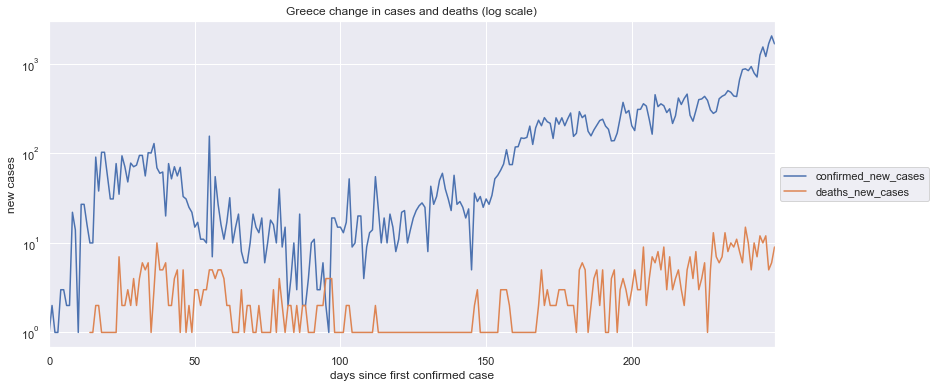

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
245      19069     280       NaN                     2.159006   
246      19564     281       NaN                     2.595836   
247      20062     282       NaN                     2.545492   
248      20331     282       NaN                     1.340843   
249      20635     282       NaN                     1.495254   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
245                                        8569.260199                 
246                                       10303.074155                 
247                                       10103.253129                 
248                                        5321.910901                 
249                                        5934.776778                 

     deaths_percentage_change  \
245                  0.358423   
246                  0.357143   
247                  0.355872   
248                       NaN   
249                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
245                                        1422.608313           
246                                        1417.527569           
247                                        1412.482987           
248                                                NaN           
249                                                NaN           

     confirmed_new_cases  deaths_new_cases  
245                403.0               1.0  
246                495.0               1.0  
247                498.0               1.0  
248                269.0               NaN  
249                304.0               NaN

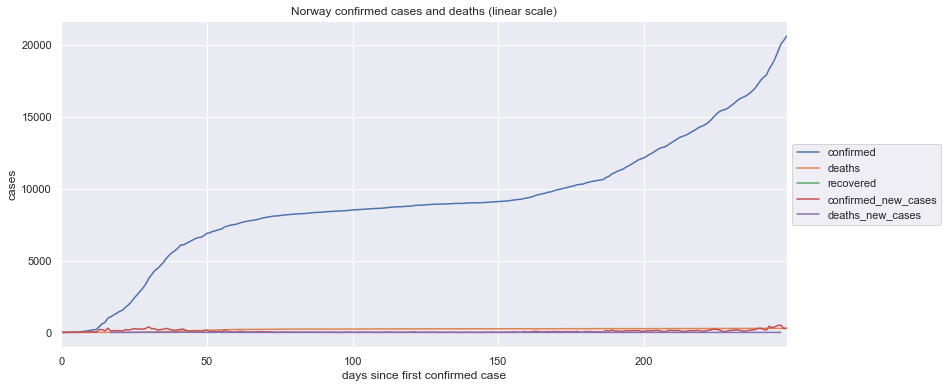

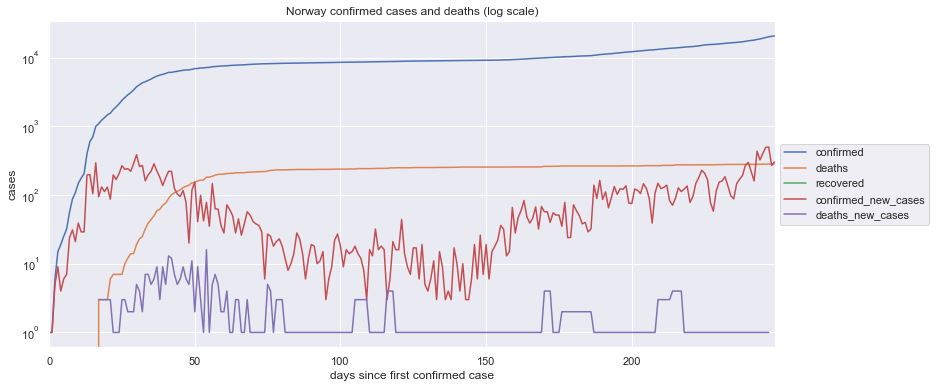

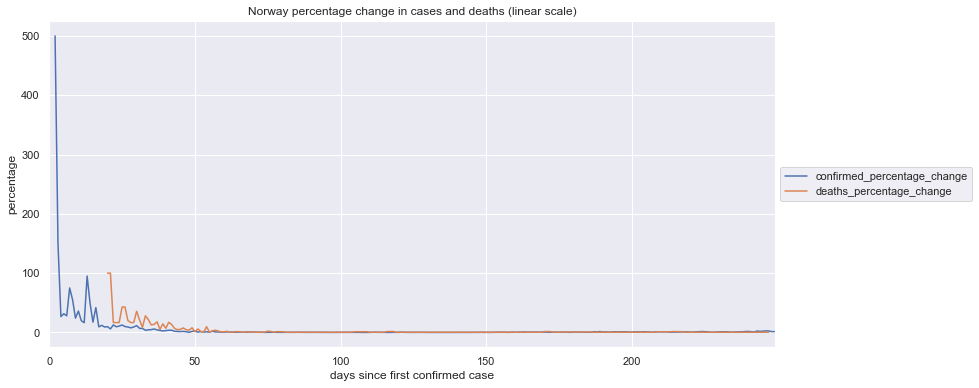

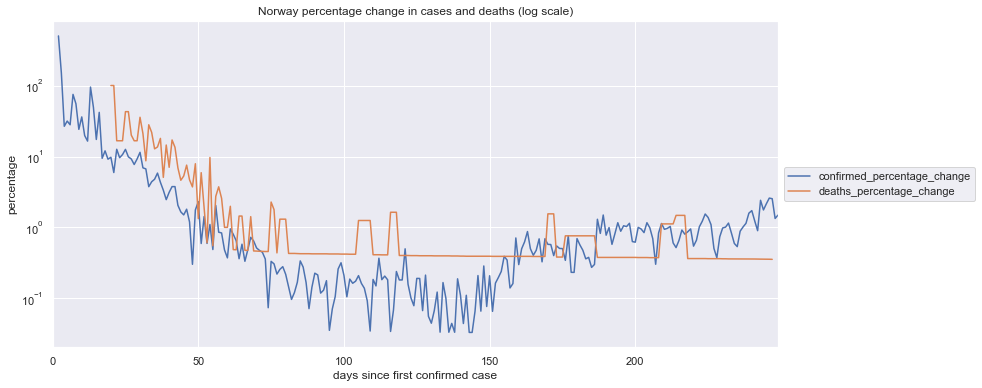

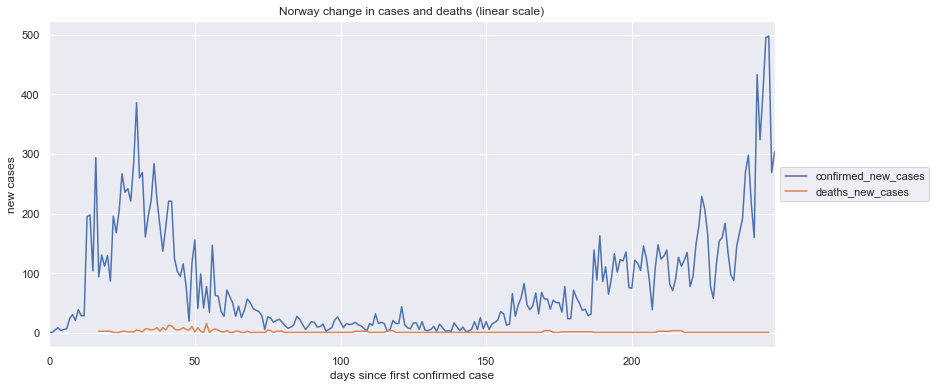

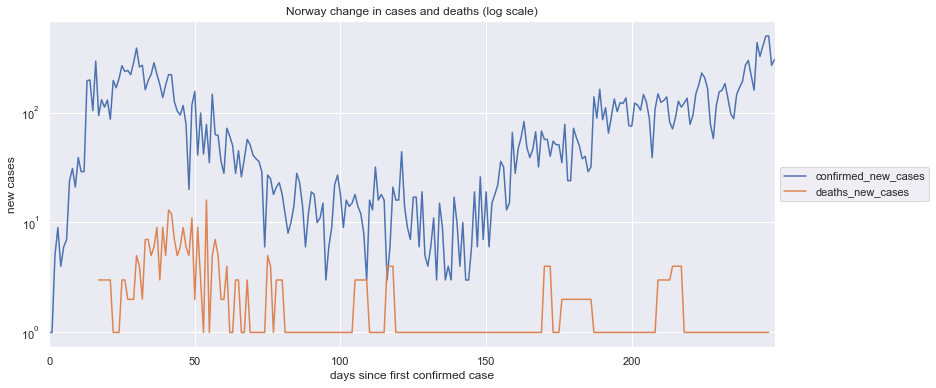

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths  recovered  confirmed_percentage_change  \
246      89496    1027      61684                     3.941836   
247      93949    1056      63366                     4.975641   
248      99576    1082      64987                     5.989420   
249     104925    1109      67226                     5.371776   
250     109881    1130      69336                     4.723374   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
246                                       41925.572783                 
247                                       52921.174752                 
248                                       63703.773628                 
249                                       57134.486364                 
250                                       50238.044458                 

     deaths_percentage_change  \
246                  2.189055   
247                  2.823759   
248                  2.462121   
249                  2.495379   
250                  1.893598   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
246                                       23282.897443           
247                                       30033.639283           
248                                       26187.246478           
249                                       26540.977235           
250                                       20140.402923           

     confirmed_new_cases  deaths_new_cases  
246               3394.0              22.0  
247               4453.0              29.0  
248               5627.0              26.0  
249               5349.0              27.0  
250               4956.0              21.0

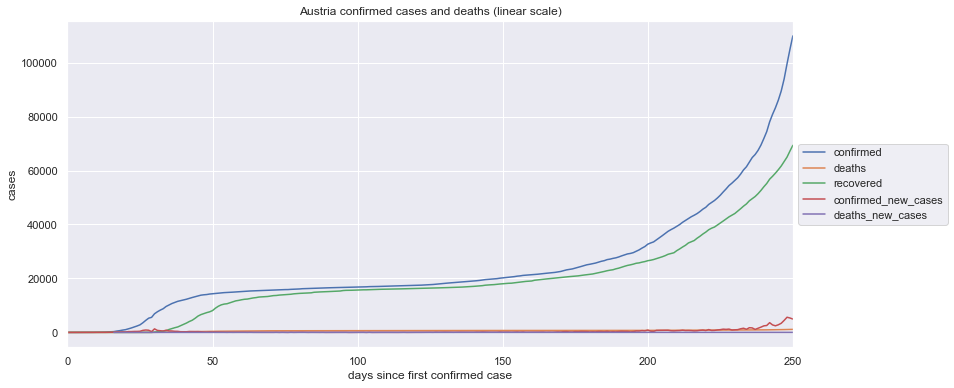

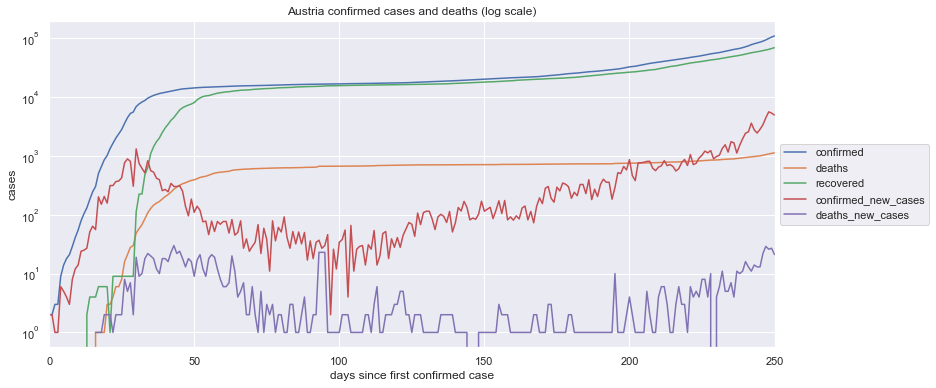

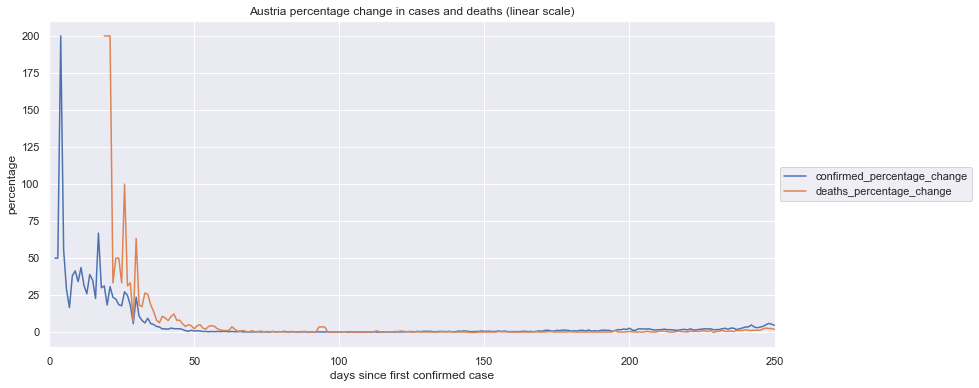

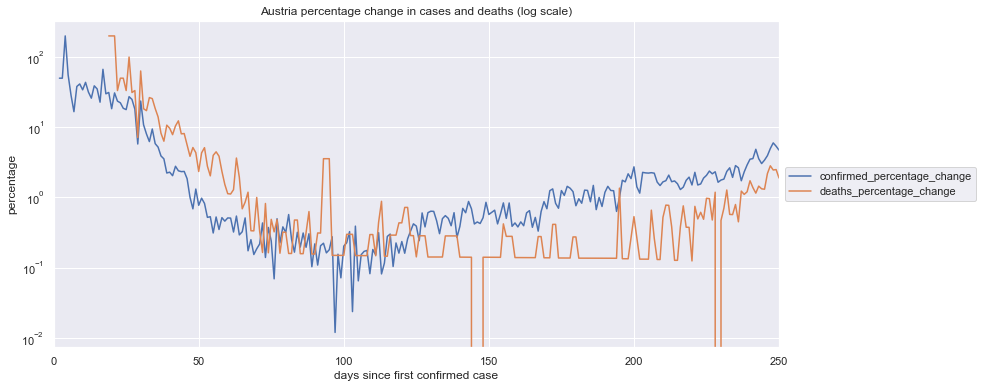

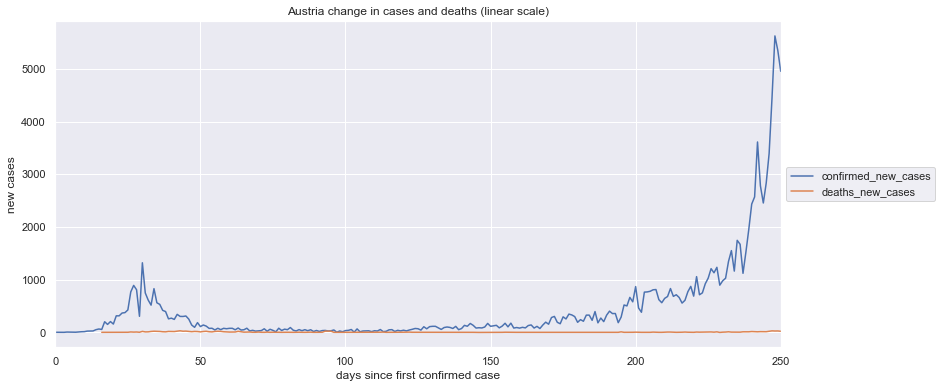

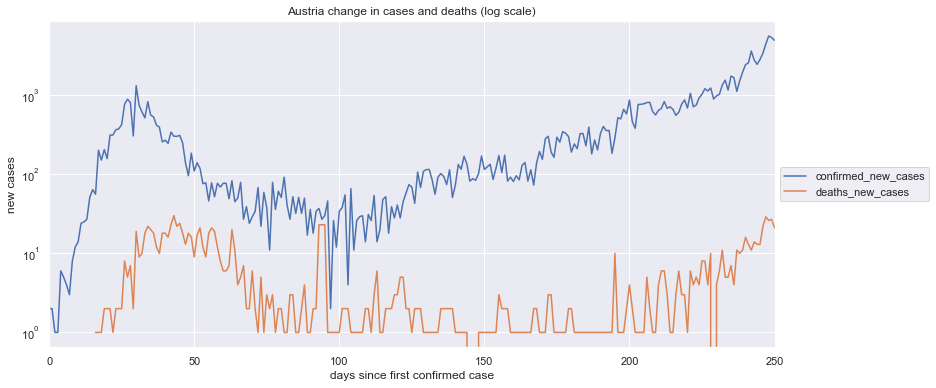

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
270     117913    5927       NaN                     1.837889   
271     121167    5934       NaN                     2.759662   
272     124355    5938       NaN                     2.631079   
273     124355    5938       NaN                          NaN   
274     124355    5938       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
270                                       44449.475839                 
271                                       66742.609078                 
272                                       63632.835777                 
273                                                NaN                 
274                                                NaN                 

     deaths_percentage_change  \
270                  0.152078   
271                  0.118104   
272                  0.067408   
273                       NaN   
274                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
270                                        3678.026627           
271                                        2856.343495           
272                                        1630.270874           
273                                                NaN           
274                                                NaN           

     confirmed_new_cases  deaths_new_cases  
270               2128.0               9.0  
271               3254.0               7.0  
272               3188.0               4.0  
273                  NaN               NaN  
274                  NaN               NaN

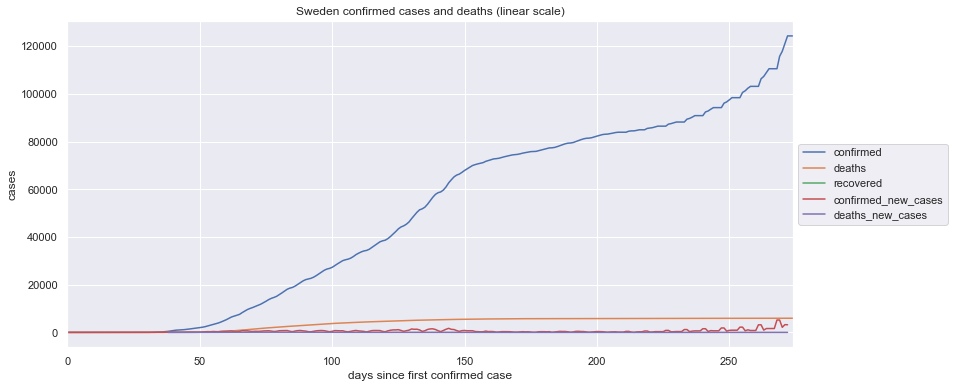

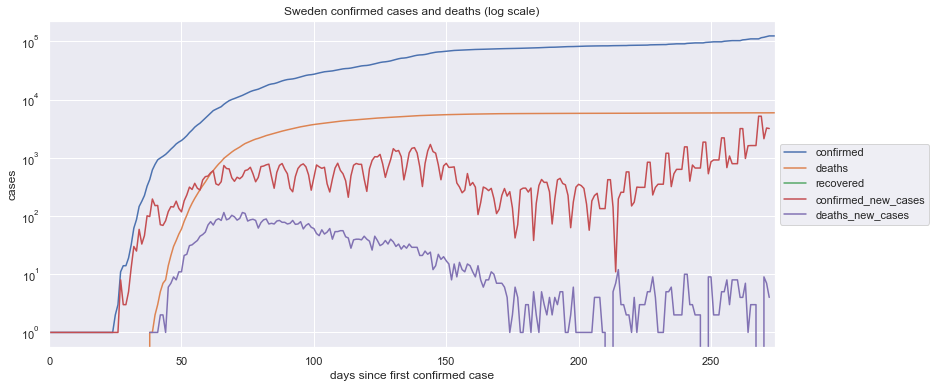

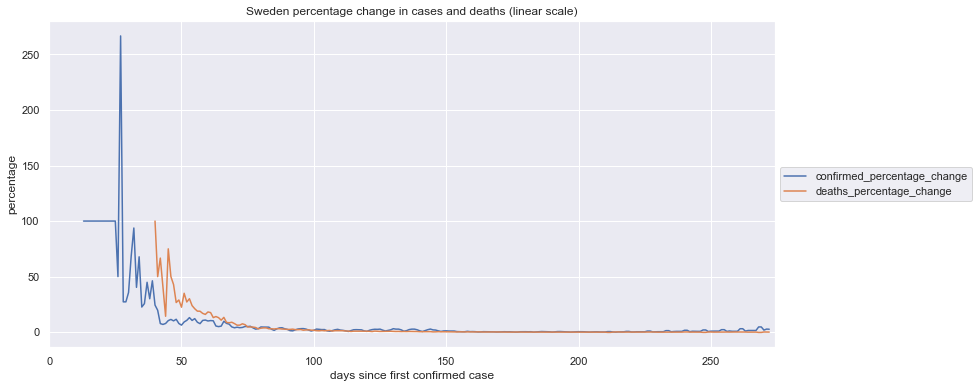

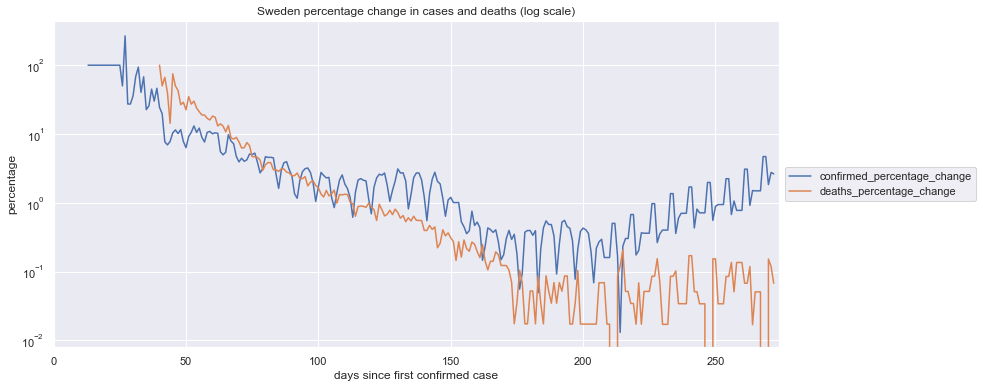

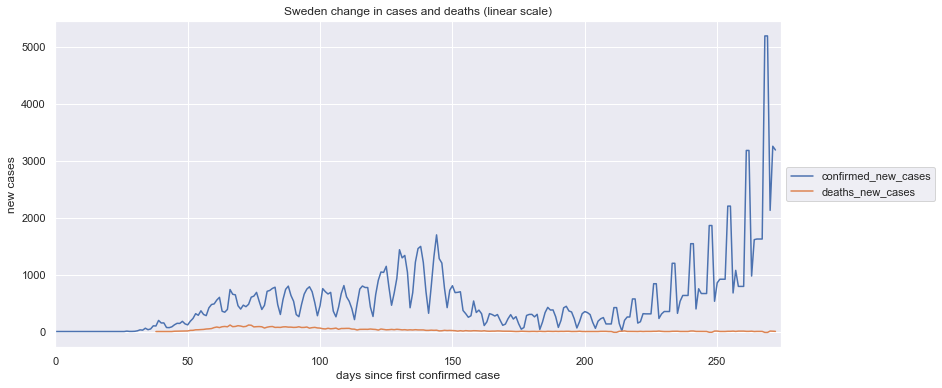

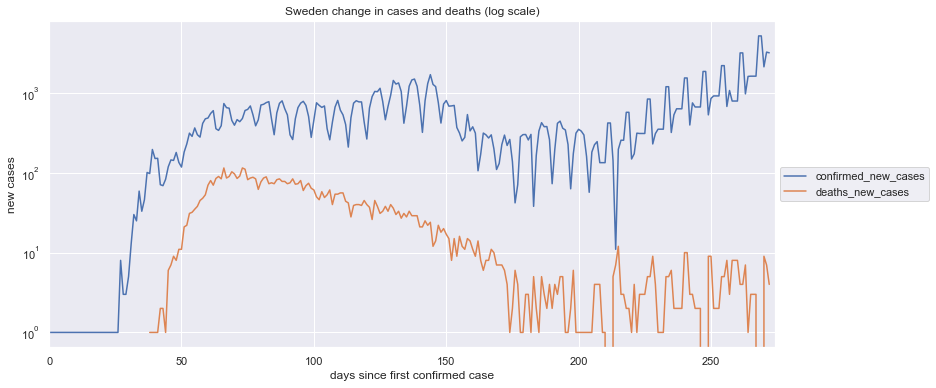

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
242      59434    1896       NaN                     1.134991   
243      60297    1902       NaN                     1.452031   
244      61059    1908       NaN                     1.263744   
245      61456    1913       NaN                     0.650191   
246      62002    1915       NaN                     0.888441   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
242                                       12025.382057                 
243                                       15384.465280                 
244                                       13389.545539                 
245                                        6888.860490                 
246                                        9413.148783                 

     deaths_percentage_change  \
242                  0.317460   
243                  0.316456   
244                  0.315457   
245                  0.262055   
246                  0.104548   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
242                                        3363.535505           
243                                        3352.891406           
244                                        3342.314461           
245                                        2776.503365           
246                                        1107.698572           

     confirmed_new_cases  deaths_new_cases  
242                667.0               6.0  
243                863.0               6.0  
244                762.0               6.0  
245                397.0               5.0  
246                546.0               2.0

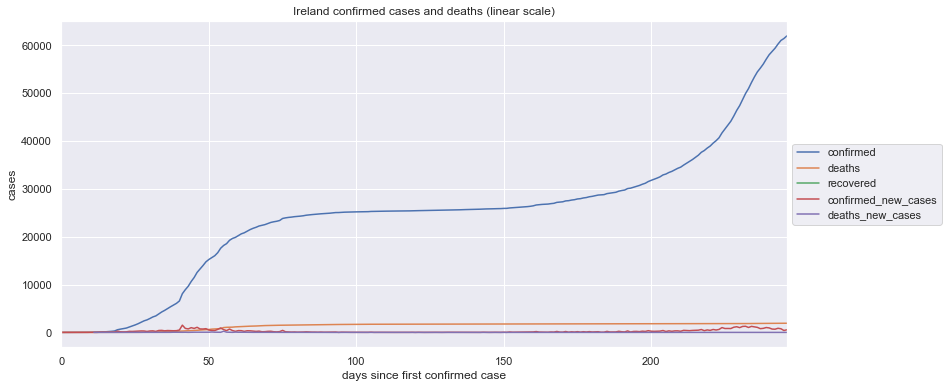

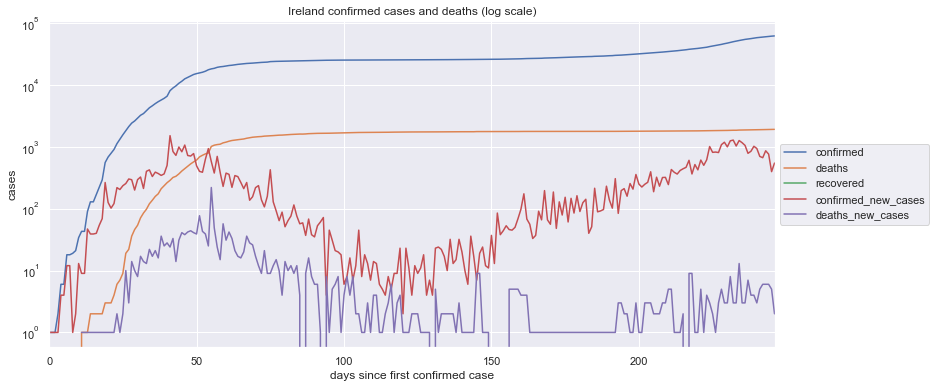

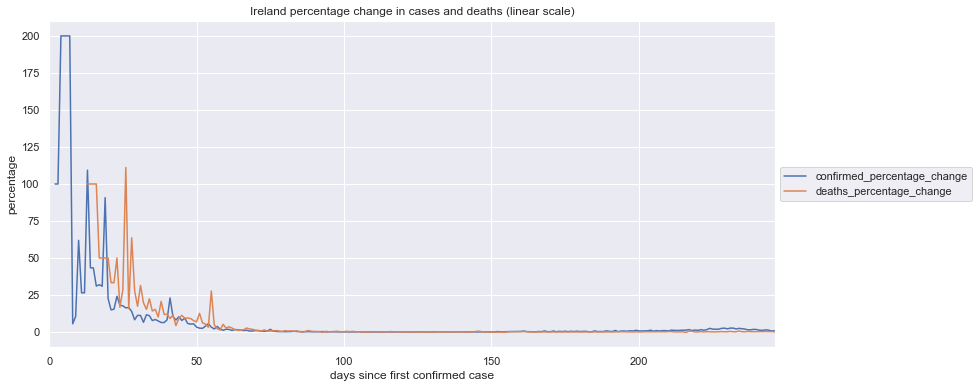

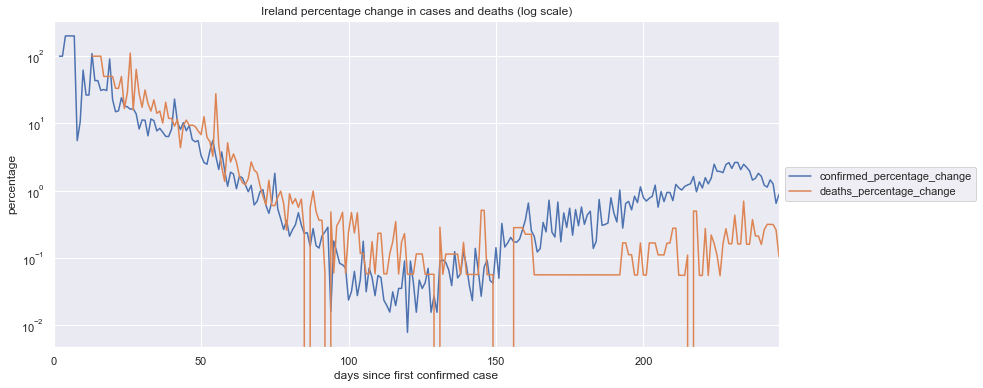

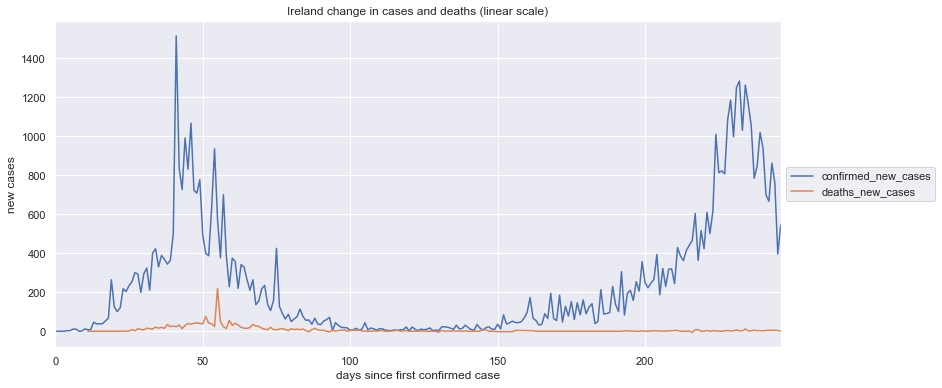

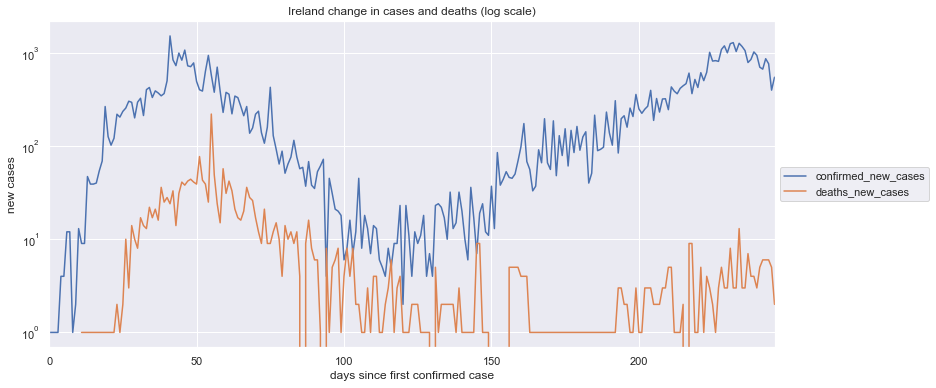

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
271     942275   45675       NaN                     2.691878   
272     965340   45955       NaN                     2.447799   
273     989745   46229       NaN                     2.528125   
274    1011660   46555       NaN                     2.214207   
275    1034914   46717       NaN                     2.298598   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
271                                      340571.126066                 
272                                      309690.750552                 
273                                      319853.387318                 
274                                      280137.083531                 
275                                      290814.149885                 

     deaths_percentage_change  \
271                  0.683346   
272                  0.613027   
273                  0.596235   
274                  0.705185   
275                  0.347976   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
271                                       86455.618695           
272                                       77558.949788           
273                                       75434.538341           
274                                       89218.629022           
275                                       44025.178753           

     confirmed_new_cases  deaths_new_cases  
271              24700.0             310.0  
272              23065.0             280.0  
273              24405.0             274.0  
274              21915.0             326.0  
275              23254.0             162.0

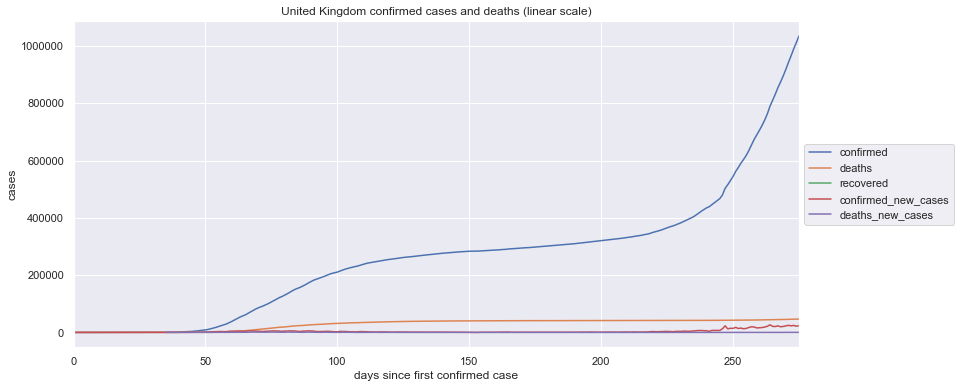

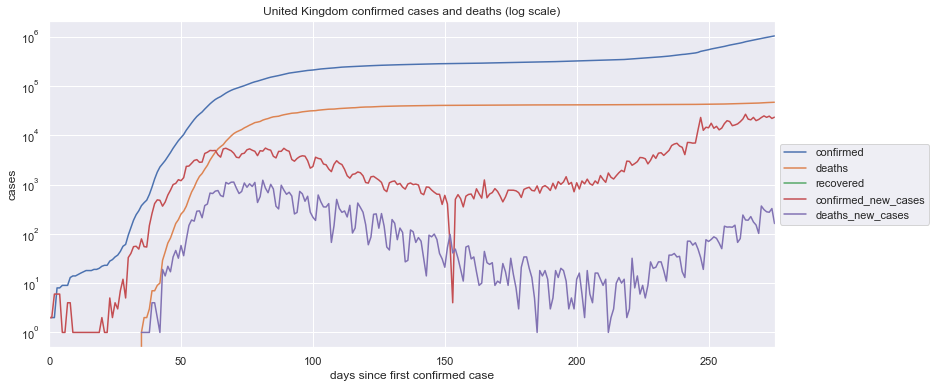

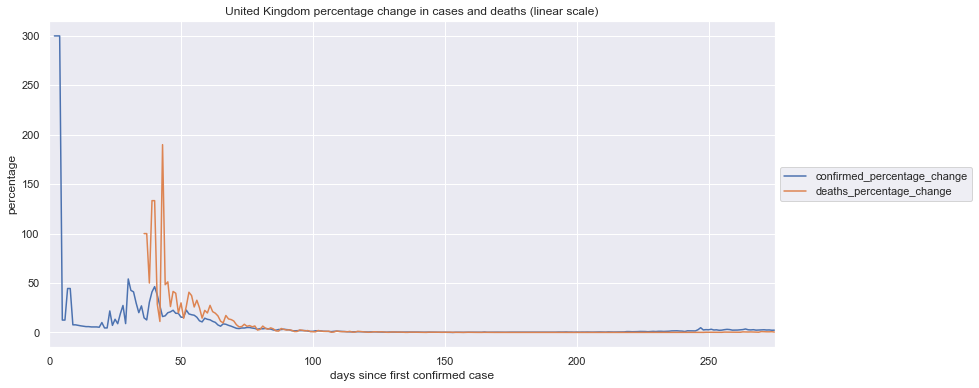

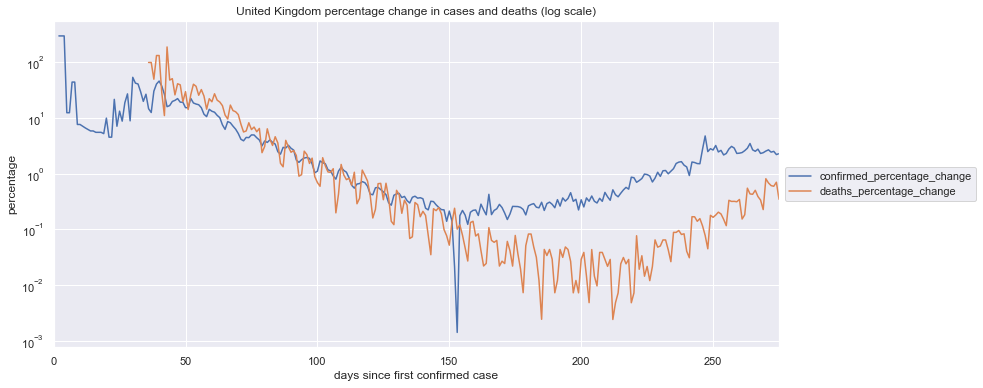

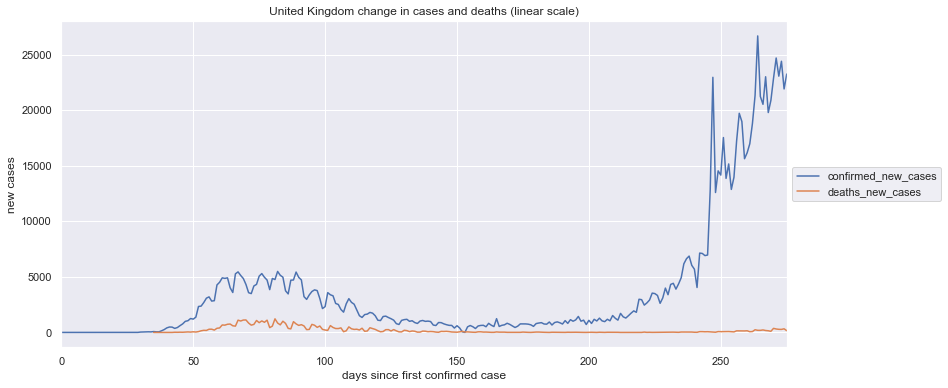

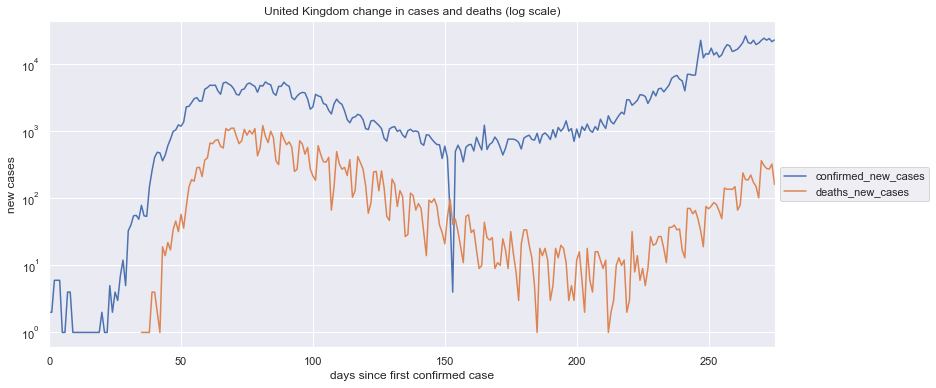

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
275     486972   10259       NaN                     5.082442   
276     498354   10305       NaN                     2.337301   
277     517736   10391       NaN                     3.889203   
278     531790   10483       NaN                     2.714511   
279     552060   10541       NaN                     3.811655   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
275                                      438443.475668                 
276                                      201630.304503                 
277                                      335507.209056                 
278                                      234170.832911                 
279                                      328817.405142                 

     deaths_percentage_change  \
275                  1.363502   
276                  0.448387   
277                  0.834546   
278                  0.885382   
279                  0.553277   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
275                                      117624.252648           
276                                       38680.672614           
277                                       71993.231969           
278                                       76378.600780           
279                                       47729.141551           

     confirmed_new_cases  deaths_new_cases  
275              23553.0             138.0  
276              11382.0              46.0  
277              19382.0              86.0  
278              14054.0              92.0  
279              20270.0              58.0

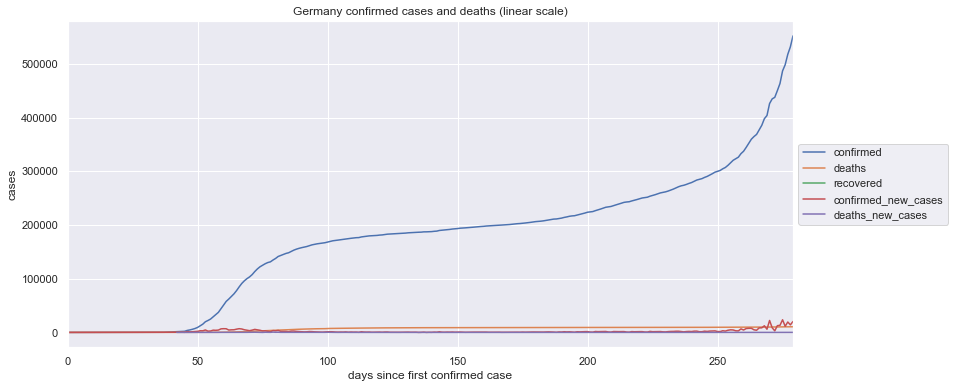

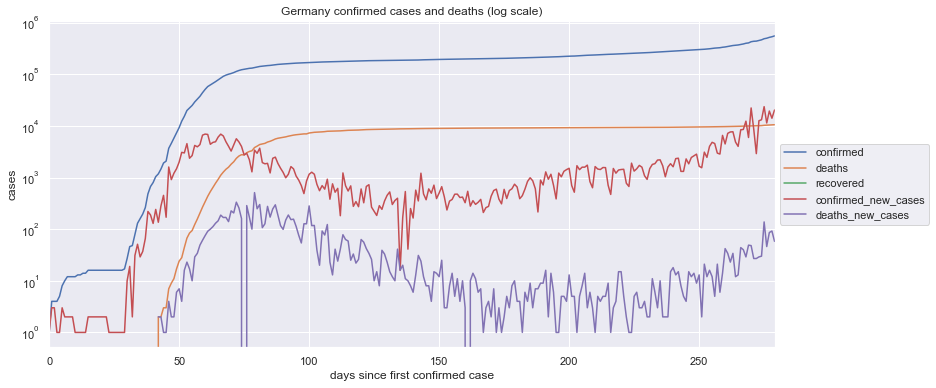

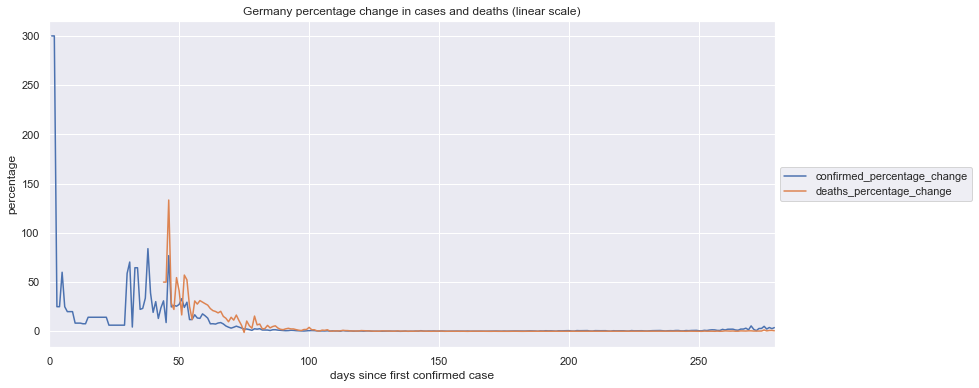

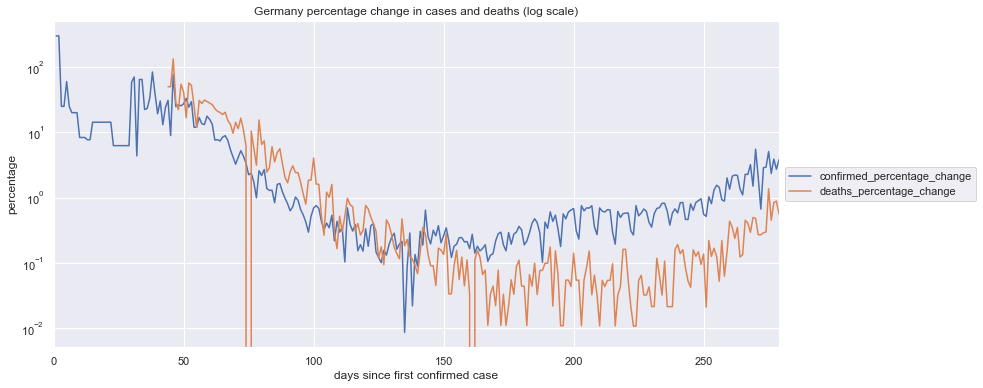

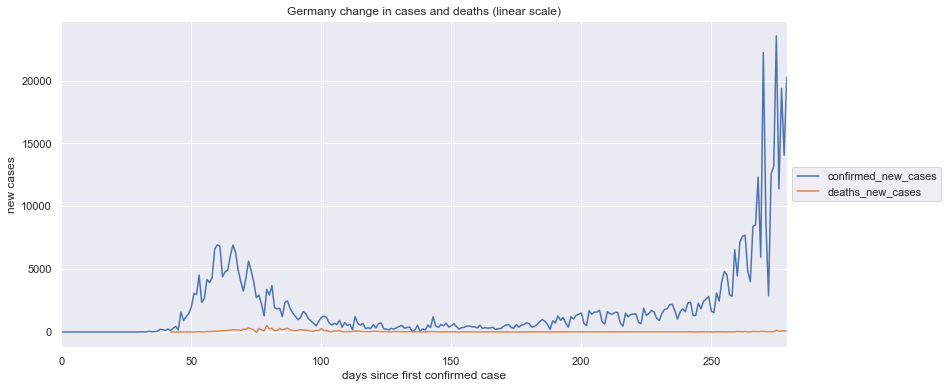

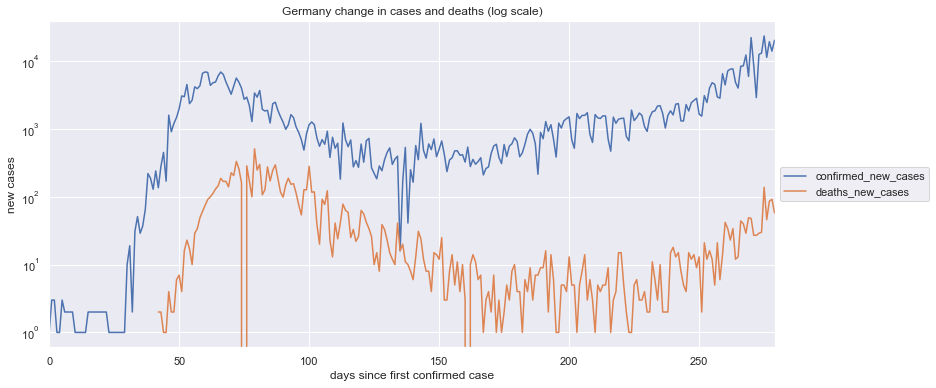

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
271     589766   37905       NaN                     4.424393   
272     616595   38122       NaN                     4.549092   
273     647674   38321       NaN                     5.040424   
274     679430   38618       NaN                     4.903084   
275     709335   38826       NaN                     4.401484   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
271                                      453249.116527                 
272                                      466023.689354                 
273                                      516357.248460                 
274                                      502287.731046                 
275                                      450902.172484                 

     deaths_percentage_change  \
271                  0.543767   
272                  0.572484   
273                  0.522008   
274                  0.775032   
275                  0.538609   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
271                                       55705.201685           
272                                       58647.090700           
273                                       53476.212391           
274                                       79396.773818           
275                                       55176.836472           

     confirmed_new_cases  deaths_new_cases  
271              24988.0             205.0  
272              26829.0             217.0  
273              31079.0             199.0  
274              31756.0             297.0  
275              29905.0             208.0

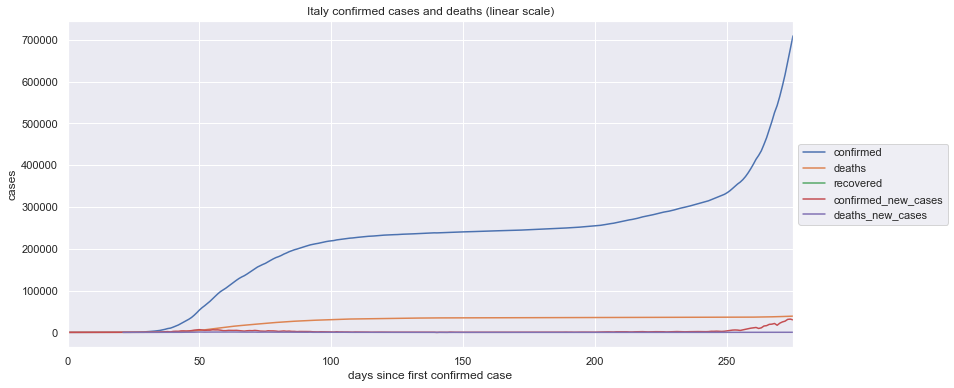

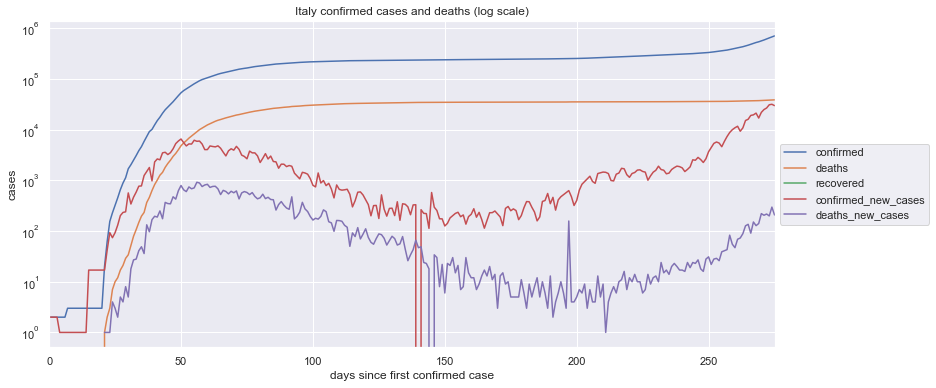

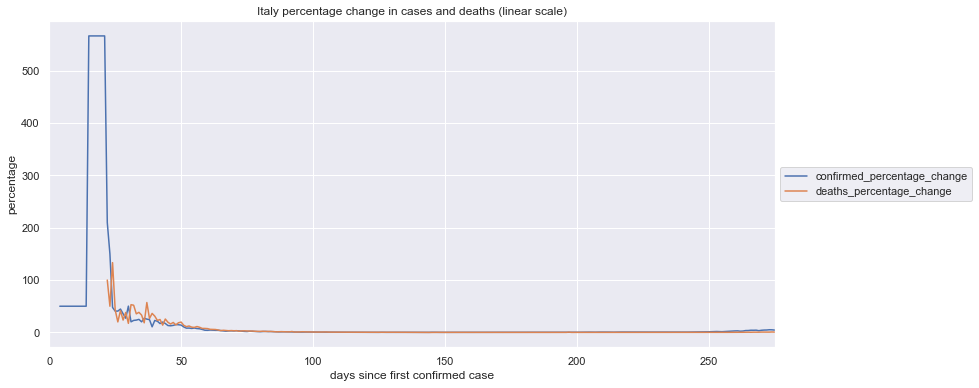

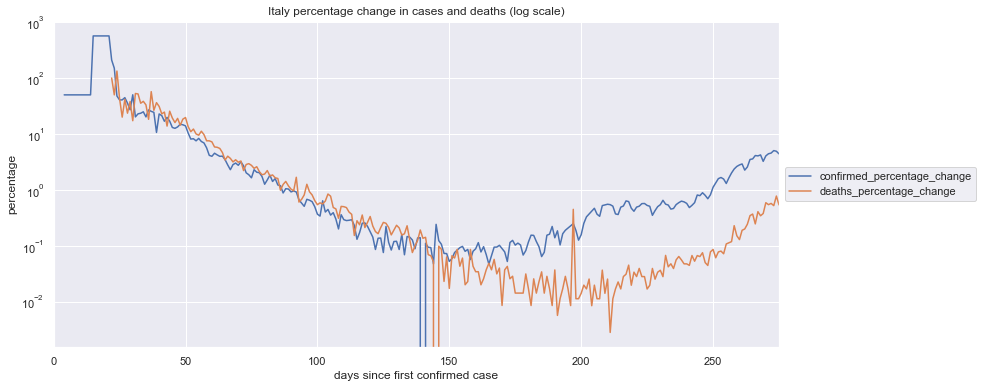

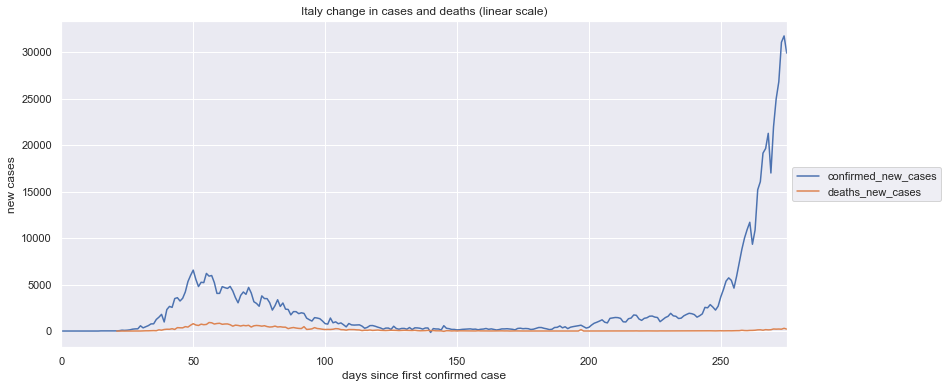

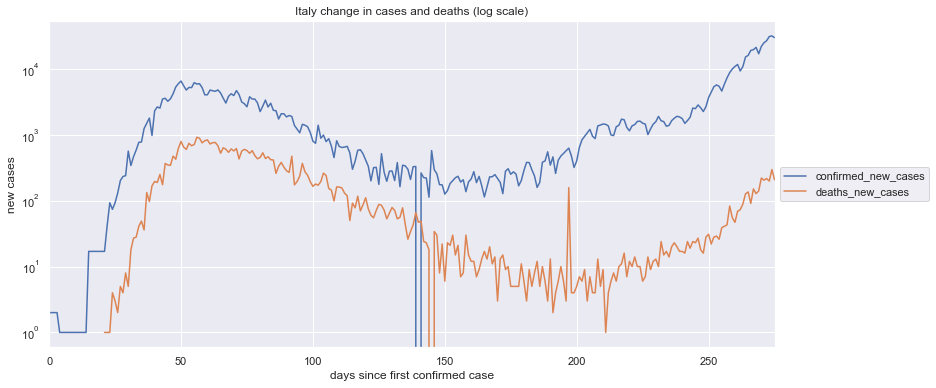

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
280    8856413  227685       NaN                     0.892658   
281    8944934  228656       NaN                     0.999513   
282    9044255  229686       NaN                     1.110360   
283    9133381  230594       NaN                     0.985443   
284    9206975  230995       NaN                     0.805770   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
280                                       1.359307e+06                 
281                                       1.522022e+06                 
282                                       1.690816e+06                 
283                                       1.500597e+06                 
284                                       1.226996e+06                 

     deaths_percentage_change  \
280                  0.436267   
281                  0.426466   
282                  0.450458   
283                  0.395322   
284                  0.173899   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
280                                      664331.585470           
281                                      649407.465340           
282                                      685941.517266           
283                                      601982.395566           
284                                      264806.619192           

     confirmed_new_cases  deaths_new_cases  
280              78358.0             989.0  
281              88521.0             971.0  
282              99321.0            1030.0  
283              89126.0             908.0  
284              73594.0             401.0

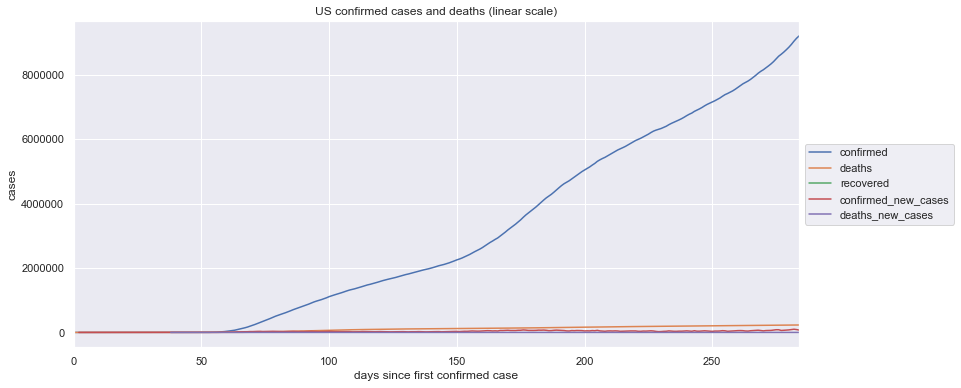

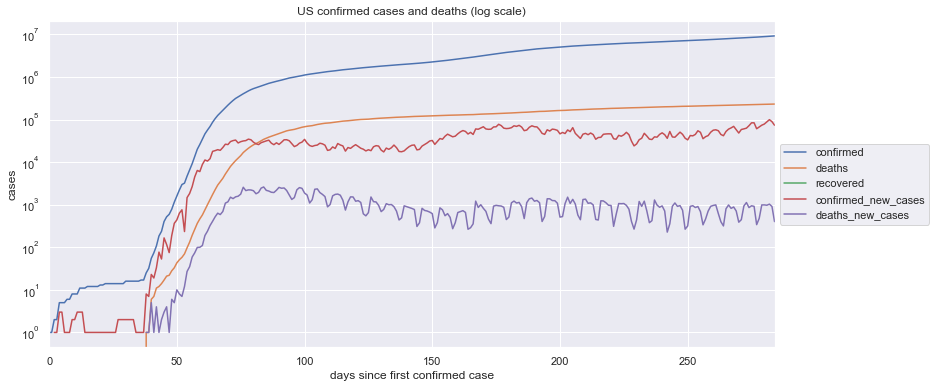

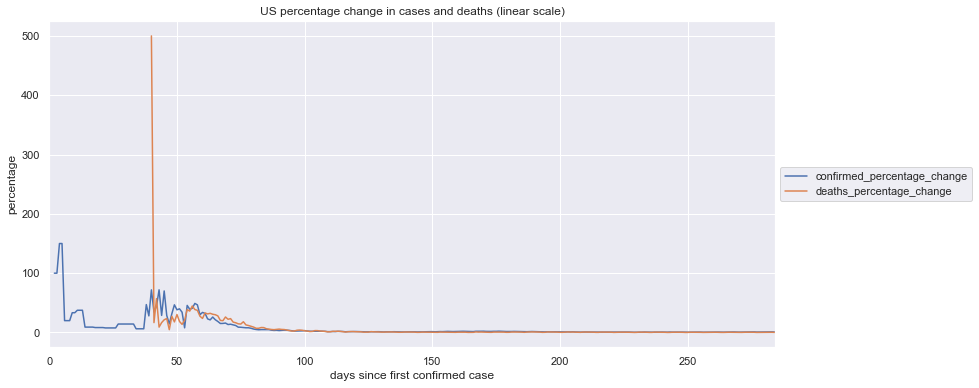

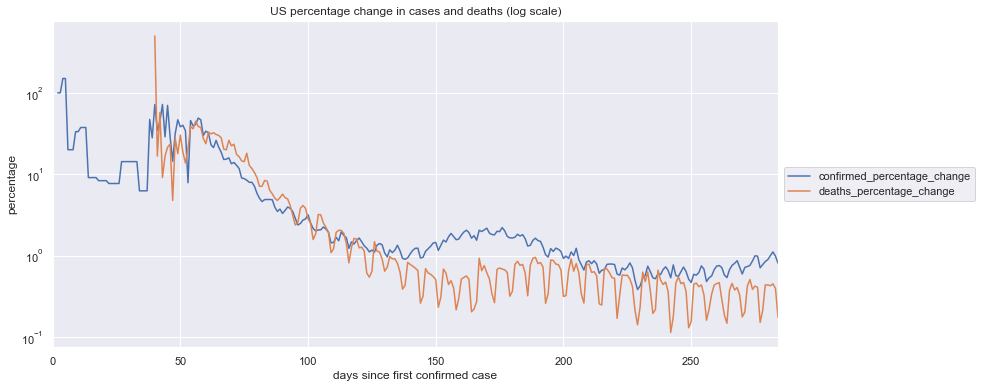

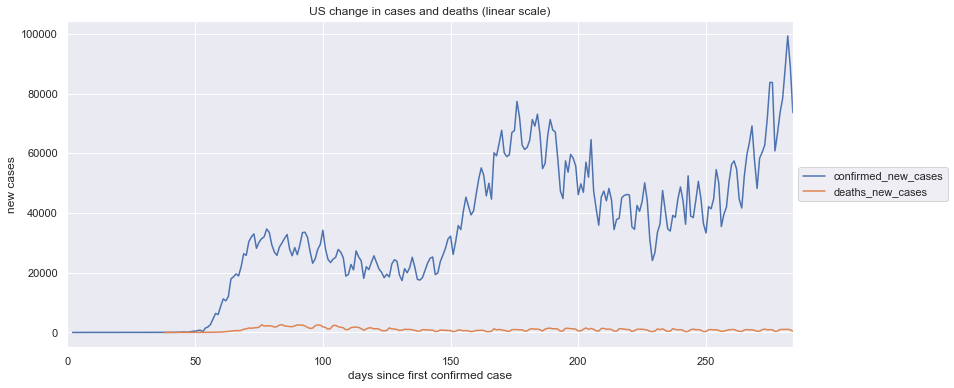

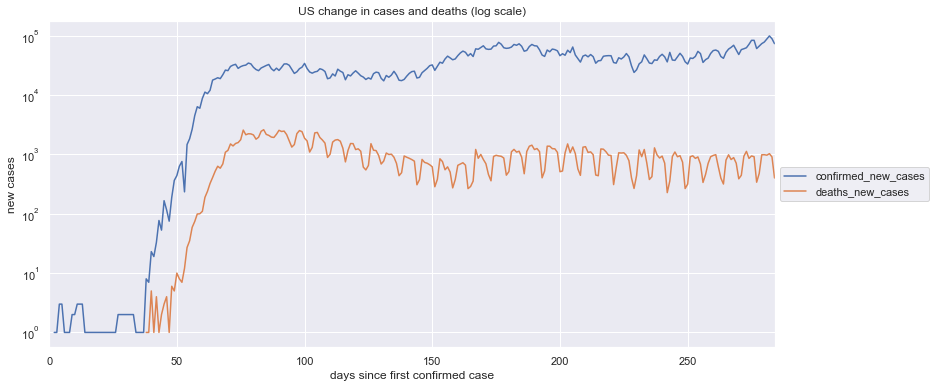

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
232        340       0       NaN                     0.294985   
233        340       0       NaN                     1.764706   
234        346       0       NaN                     1.764706   
235        346       0       NaN                     1.764706   
236        349       0       NaN                     0.867052   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
232                                          24.386482                 
233                                         145.888545                 
234                                         145.888545                 
235                                         145.888545                 
236                                          71.679343                 

     deaths_percentage_change  \
232                       NaN   
233                       NaN   
234                       NaN   
235                       NaN   
236                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
232                                                NaN           
233                                                NaN           
234                                                NaN           
235                                                NaN           
236                                                NaN           

     confirmed_new_cases  deaths_new_cases  
232                  1.0               NaN  
233                  6.0               NaN  
234                  6.0               NaN  
235                  6.0               NaN  
236                  3.0               NaN

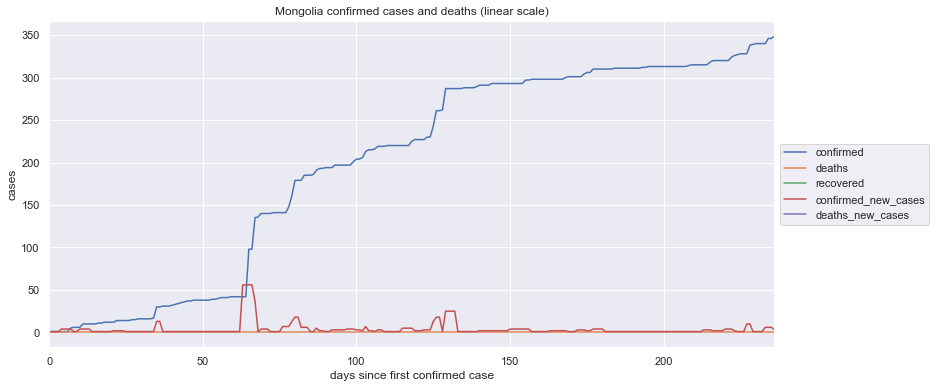

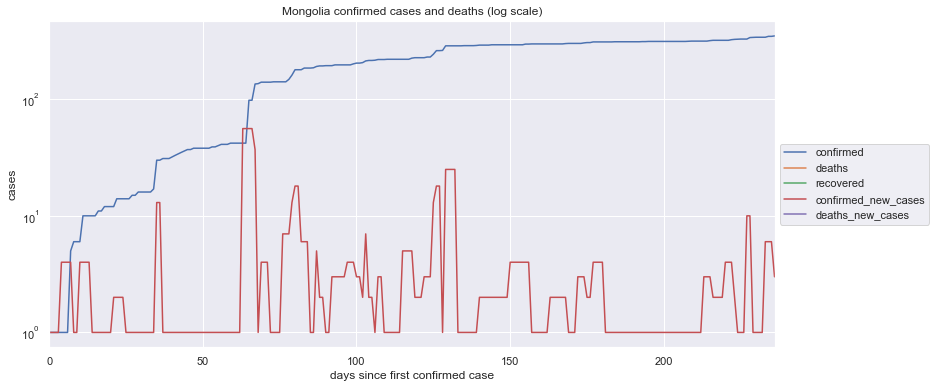

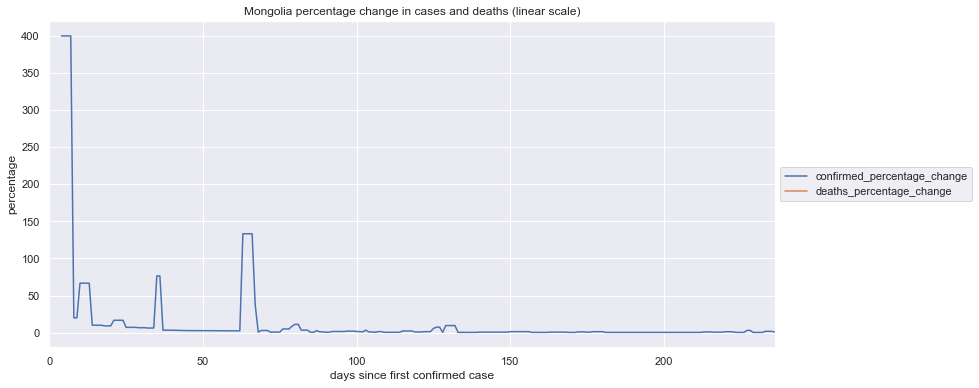

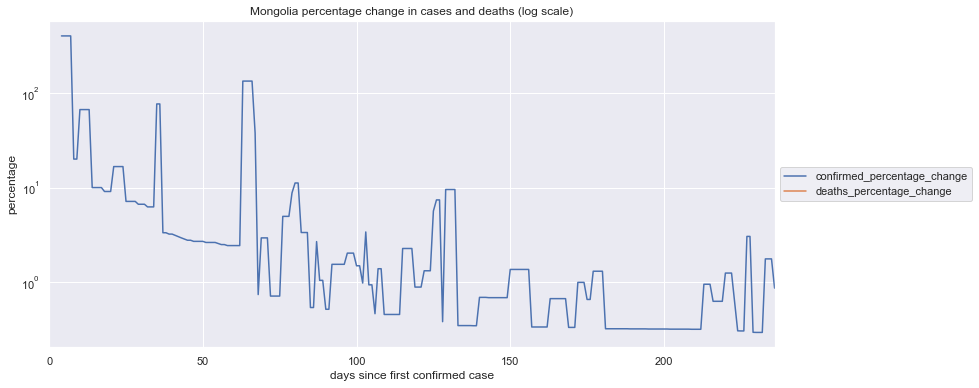

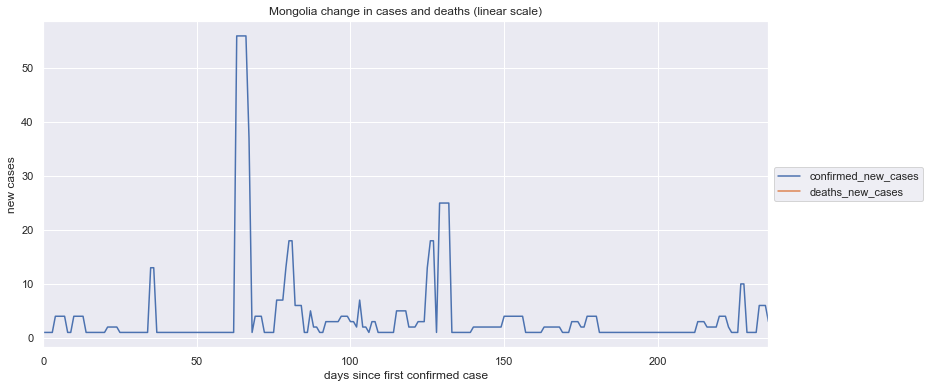

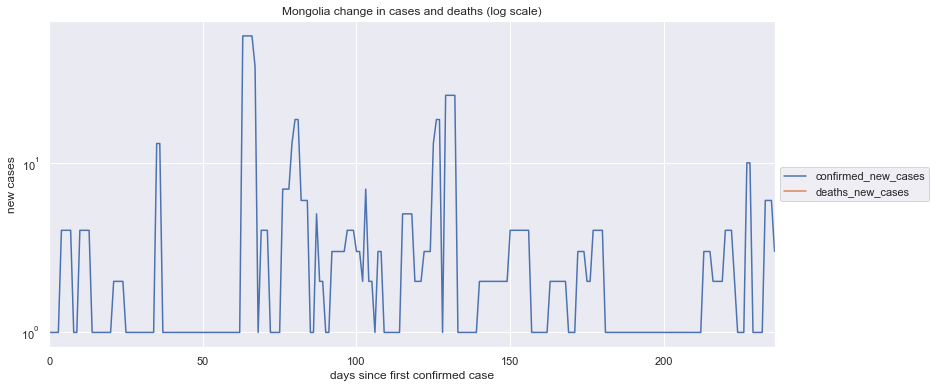

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# South Africa

confirmed  deaths recovered  confirmed_percentage_change  \
237     719714   19111       NaN                     0.259525   
238     721770   19164       NaN                     0.285669   
239     723682   19230       NaN                     0.264904   
240     725452   19276       NaN                     0.244583   
241     726823   19411       NaN                     0.188986   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
237                                       33261.663708                 
238                                       36612.432391                 
239                                       33951.149595                 
240                                       31346.634412                 
241                                       24221.118564                 

     deaths_percentage_change  \
237                  0.304414   
238                  0.277327   
239                  0.344396   
240                  0.239210   
241                  0.700353   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
237                                       39014.859676           
238                                       35543.310888           
239                                       44139.071834           
240                                       30658.010638           
241                                       89759.882210           

     confirmed_new_cases  deaths_new_cases  
237               1863.0              58.0  
238               2056.0              53.0  
239               1912.0              66.0  
240               1770.0              46.0  
241               1371.0             135.0

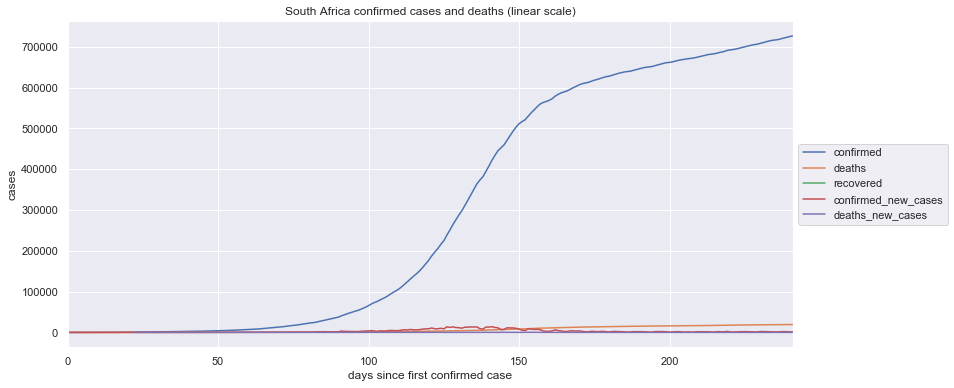

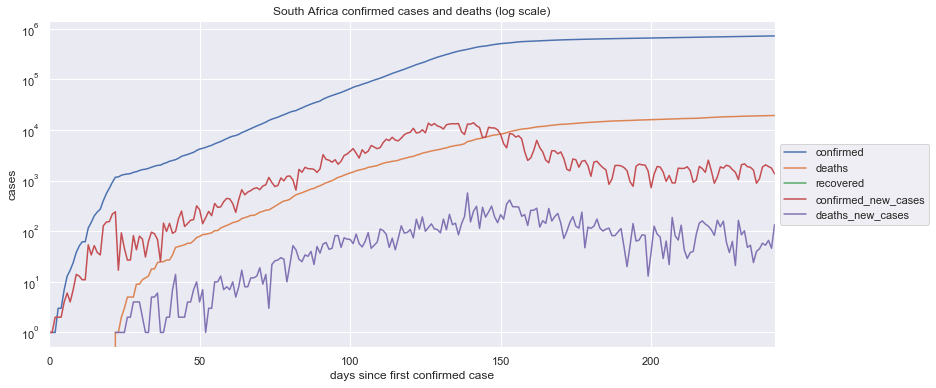

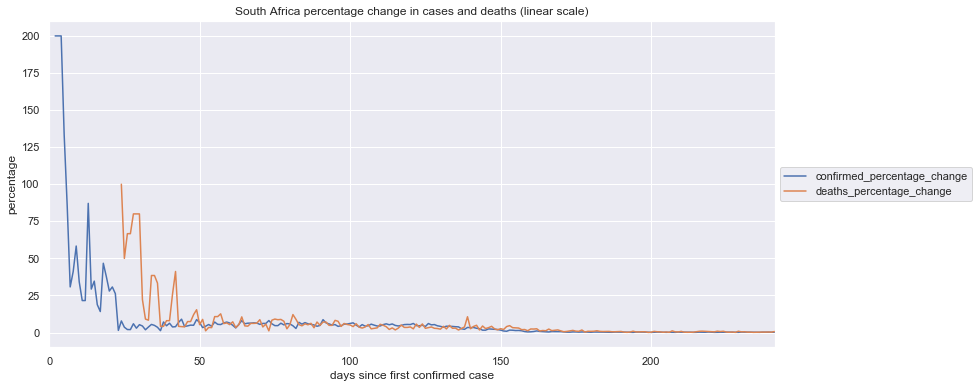

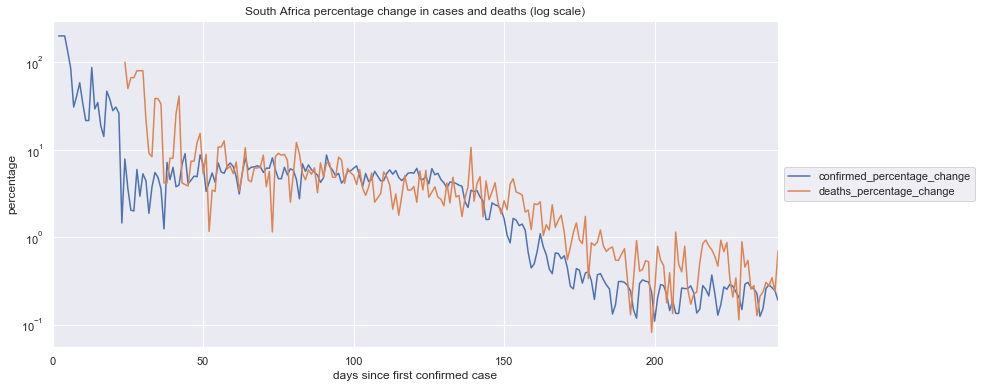

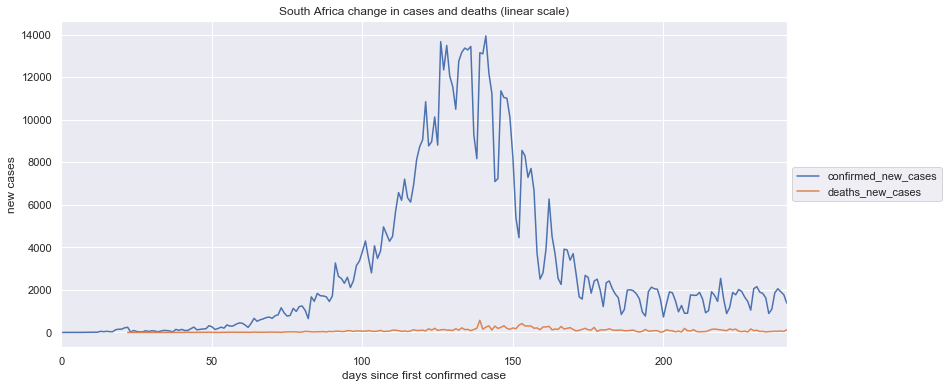

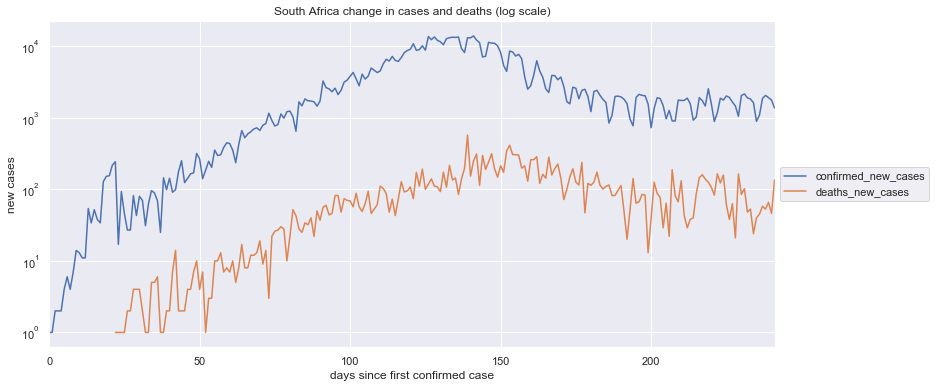

In [21]:
location_name = 'South Africa'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [22]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']
South_Africa             = locations['South Africa']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia,
                            South_Africa]

In [23]:
#South_Korea

In [24]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                         South_Africa.add_suffix('_South_Africa'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
280                  26271                 462                   NaN   
281                  26385                 463                   NaN   
282                  26511                 464                   NaN   
283                  26635                 466                   NaN   
284                  26732                 468                   NaN   

     confirmed_percentage_change_South_Korea  \
280                                 0.478085   
281                                 0.433939   
282                                 0.477544   
283                                 0.467730   
284                                 0.364182   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
280                                        3095.374691                             
281                                        2809.549694                             
282                                        3091.874929                             
283                                        3028.335911                             
284                                        2357.911520                             

     deaths_percentage_change_South_Korea  \
280                              0.216920   
281                              0.216450   
282                              0.215983   
283                              0.431034   
284                              0.429185   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
280                                        1404.454085                       
281                                        1401.414141                       
282                                        1398.387329                       
283                                        2790.747126                       
284                                        2778.769671                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
280                            125.0                           1.0   
281                            114.0                           1.0   
282                            126.0                           1.0   
283                            124.0                           2.0   
284                             97.0                           2.0   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
280               NaN            NaN              NaN   
281               NaN            NaN              NaN   
282               NaN            NaN              NaN   
283               NaN            NaN              NaN   
284               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
280                                 NaN   
281                                 NaN   
282                                 NaN   
283                                 NaN   
284                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
280                                                NaN                        
281                                                NaN                        
282                                                NaN                        
283                                                NaN                        
284                                                NaN                        

     deaths_percentage_change_Sweden  \
280                              NaN   
281                              NaN   
282                              NaN   
283                              NaN   
284                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
280                                                NaN                  
281                                                NaN                  
282                                                NaN                  
283    

# comparisons: confirmed cases

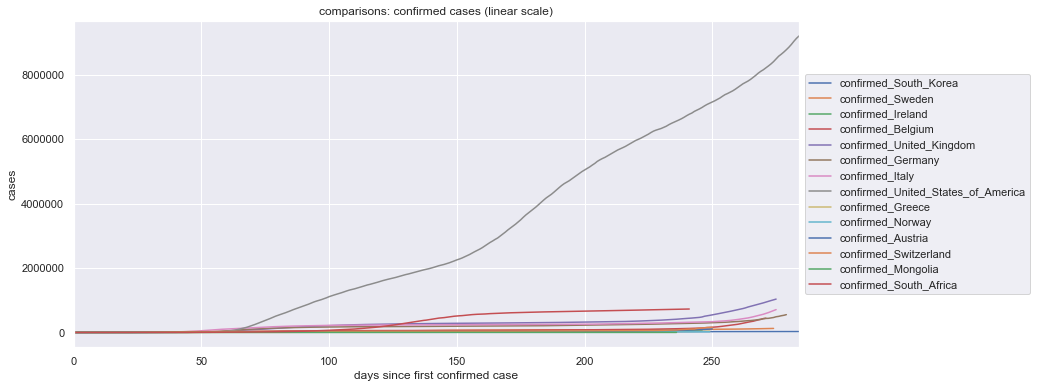

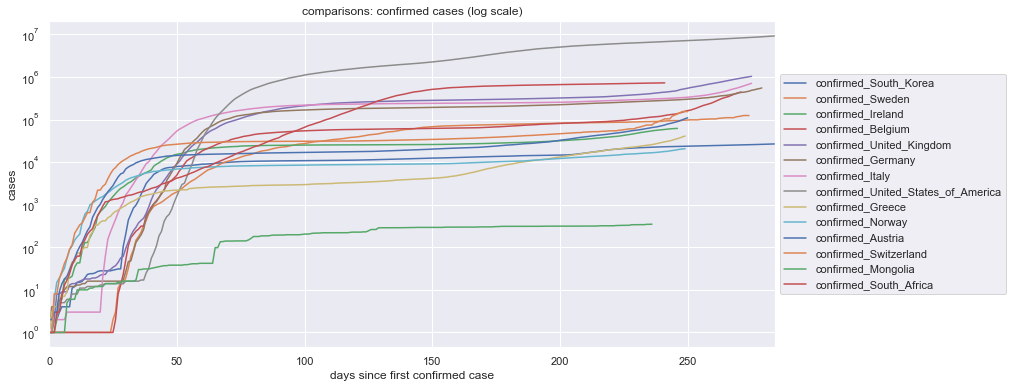

In [25]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia',
    'confirmed_South_Africa']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

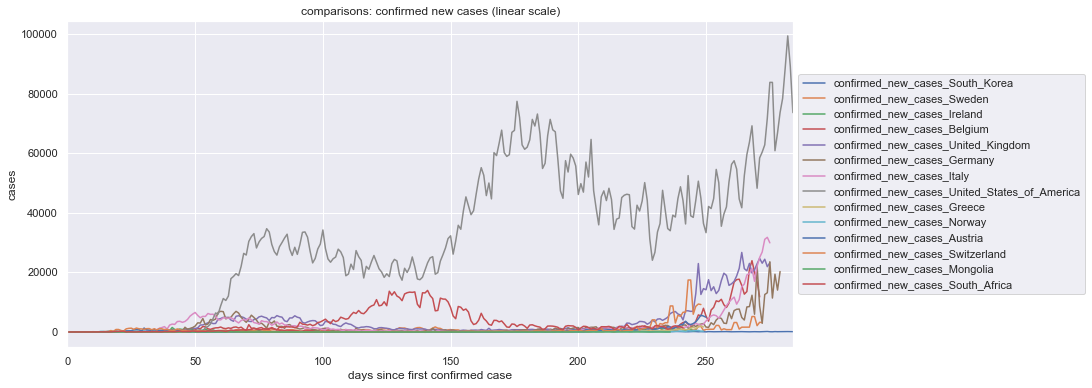

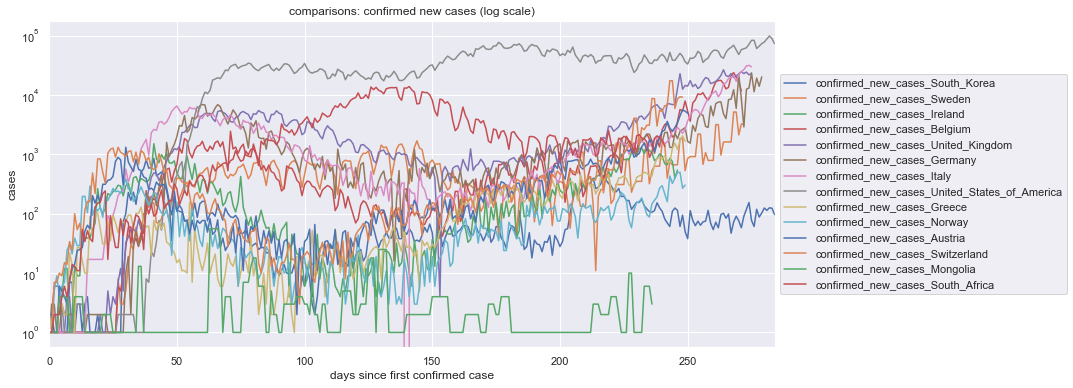

In [26]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia',
    'confirmed_new_cases_South_Africa']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

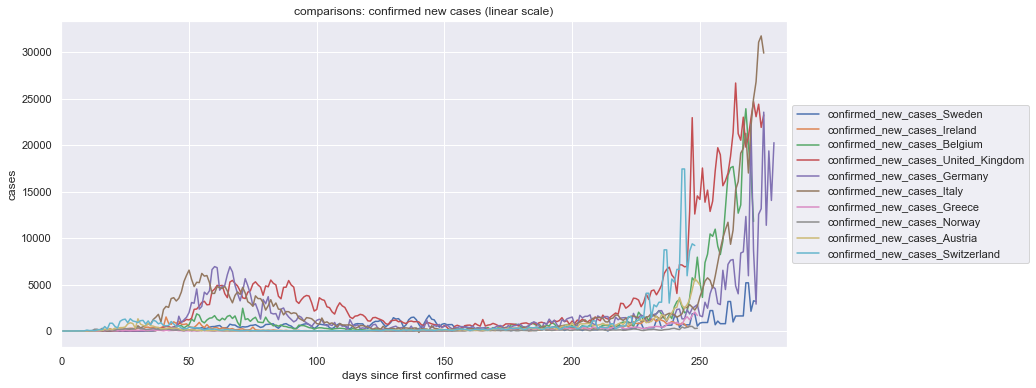

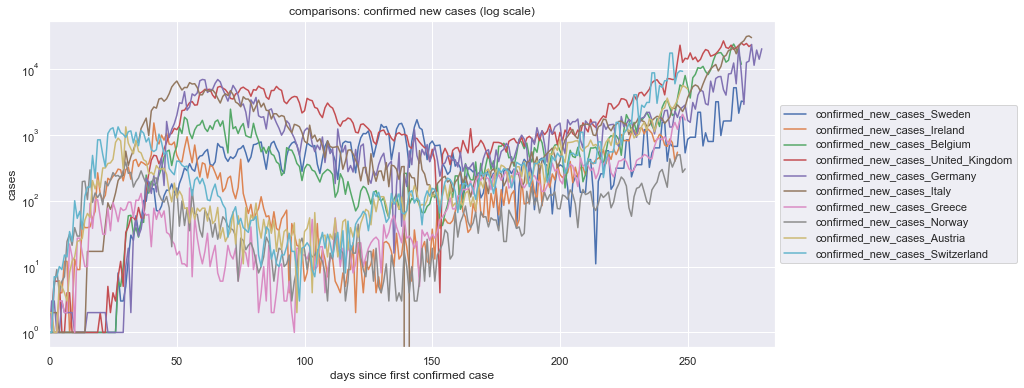

In [27]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
280                 462            NaN             NaN             NaN   
281                 463            NaN             NaN             NaN   
282                 464            NaN             NaN             NaN   
283                 466            NaN             NaN             NaN   
284                 468            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
280                    NaN             NaN           NaN   
281                    NaN             NaN           NaN   
282                    NaN             NaN           NaN   
283                    NaN             NaN           NaN   
284                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
280                           227685            NaN            NaN   
281                           228656            NaN            NaN   
282                           229686            NaN            NaN   
283                           230594            NaN            NaN   
284                           230995            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
280             NaN                 NaN              NaN  
281             NaN                 NaN              NaN  
282             NaN                 NaN              NaN  
283             NaN                 NaN              NaN  
284             NaN                 NaN              NaN

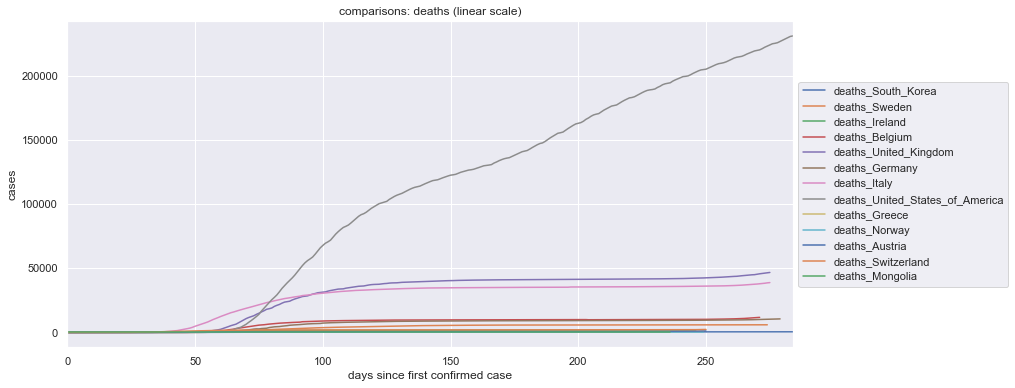

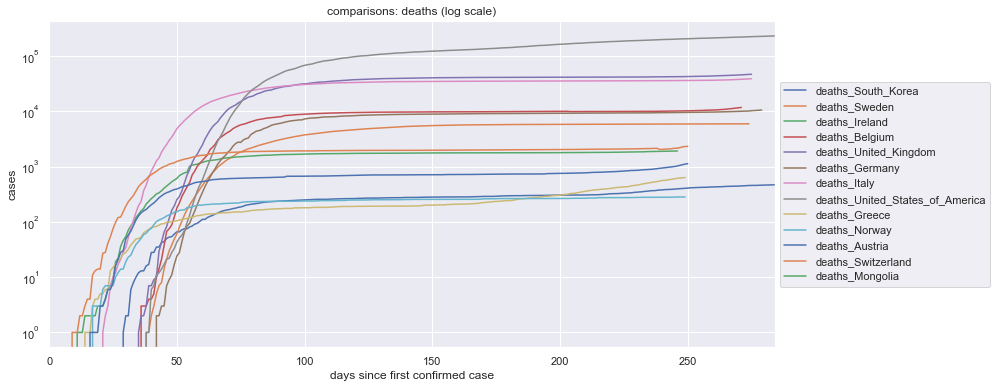

In [28]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
280            NaN             NaN             NaN                    NaN   
281            NaN             NaN             NaN                    NaN   
282            NaN             NaN             NaN                    NaN   
283            NaN             NaN             NaN                    NaN   
284            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
280             NaN           NaN            NaN            NaN   
281             NaN           NaN            NaN            NaN   
282             NaN           NaN            NaN            NaN   
283             NaN           NaN            NaN            NaN   
284             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
280             NaN                 NaN  
281             NaN                 NaN  
282             NaN                 NaN  
283             NaN                 NaN  
284             NaN                 NaN

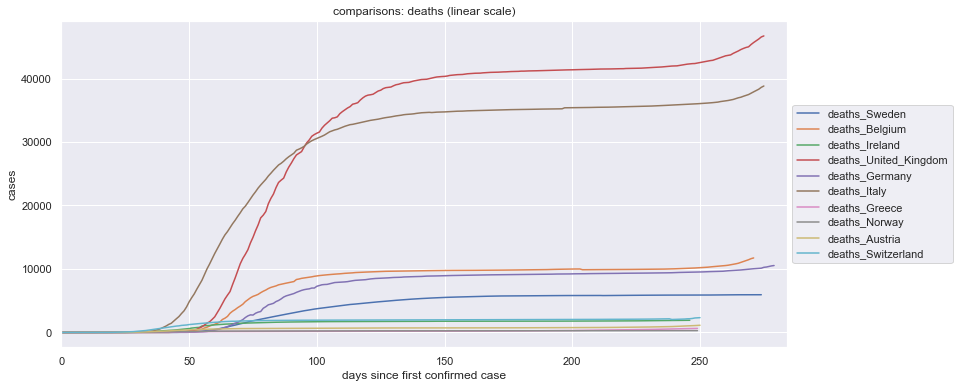

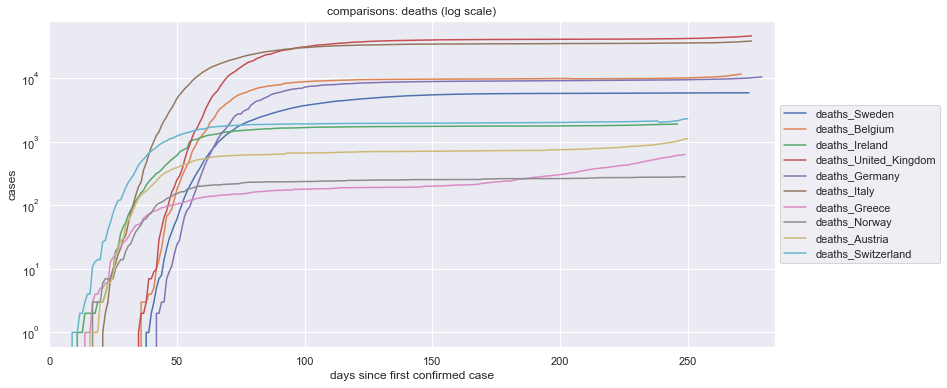

In [29]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
280                           1.0                      NaN   
281                           1.0                      NaN   
282                           1.0                      NaN   
283                           2.0                      NaN   
284                           2.0                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
280                       NaN                       NaN   
281                       NaN                       NaN   
282                       NaN                       NaN   
283                       NaN                       NaN   
284                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
280                              NaN                       NaN   
281                              NaN                       NaN   
282                              NaN                       NaN   
283                              NaN                       NaN   
284                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
280                     NaN                                      989.0   
281                     NaN                                      971.0   
282                     NaN                                     1030.0   
283                     NaN                                      908.0   
284                     NaN                                      401.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
280                      NaN                      NaN   
281                      NaN                      NaN   
282                      NaN                      NaN   
283                      NaN                      NaN   
284                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
280                       NaN                           NaN   
281                       NaN                           NaN   
282                       NaN                           NaN   
283                       NaN                           NaN   
284                       NaN                           NaN   

     deaths_new_cases_Mongolia  deaths_new_cases_South_Africa  
280                        NaN                            NaN  
281                        NaN                            NaN  
282                        NaN                            NaN  
283                        NaN                            NaN  
284                        NaN                            NaN

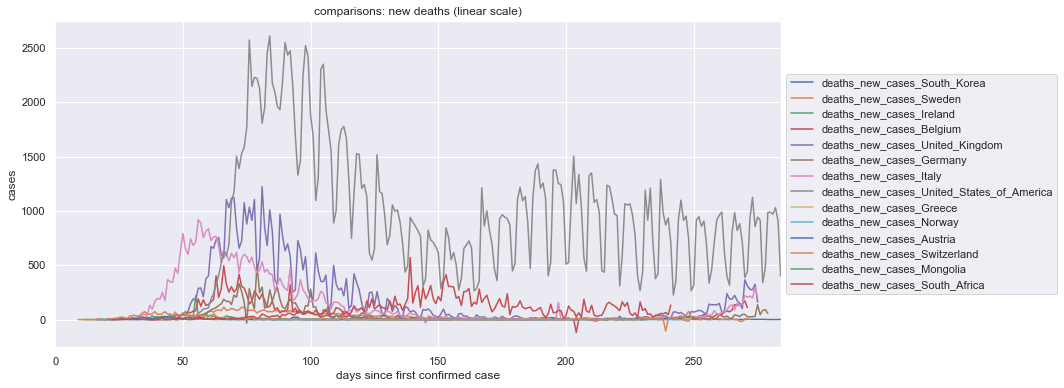

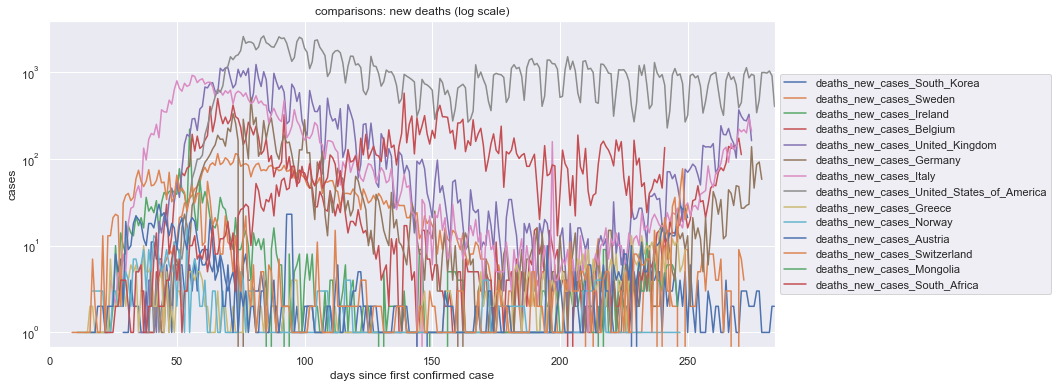

In [30]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia',
    'deaths_new_cases_South_Africa']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
280                      NaN                       NaN   
281                      NaN                       NaN   
282                      NaN                       NaN   
283                      NaN                       NaN   
284                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
280                       NaN                              NaN   
281                       NaN                              NaN   
282                       NaN                              NaN   
283                       NaN                              NaN   
284                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
280                       NaN                     NaN   
281                       NaN                     NaN   
282                       NaN                     NaN   
283                       NaN                     NaN   
284                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
280                      NaN                      NaN   
281                      NaN                      NaN   
282                      NaN                      NaN   
283                      NaN                      NaN   
284                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
280                       NaN                           NaN  
281                       NaN                           NaN  
282                       NaN                           NaN  
283                       NaN                           NaN  
284                       NaN                           NaN

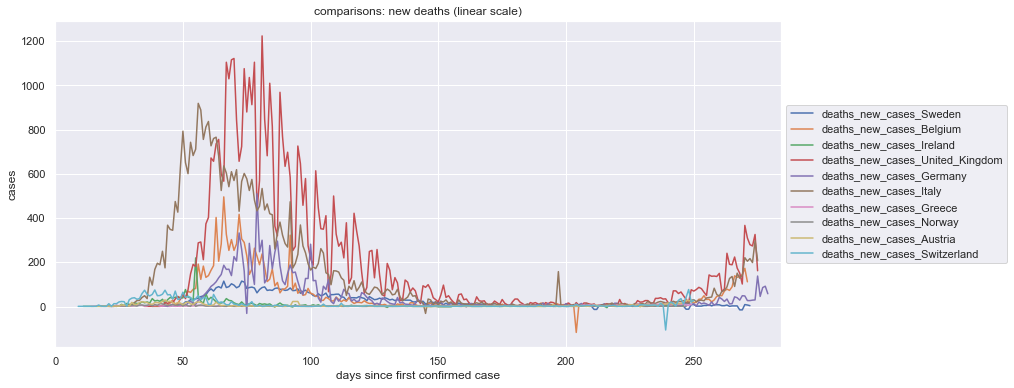

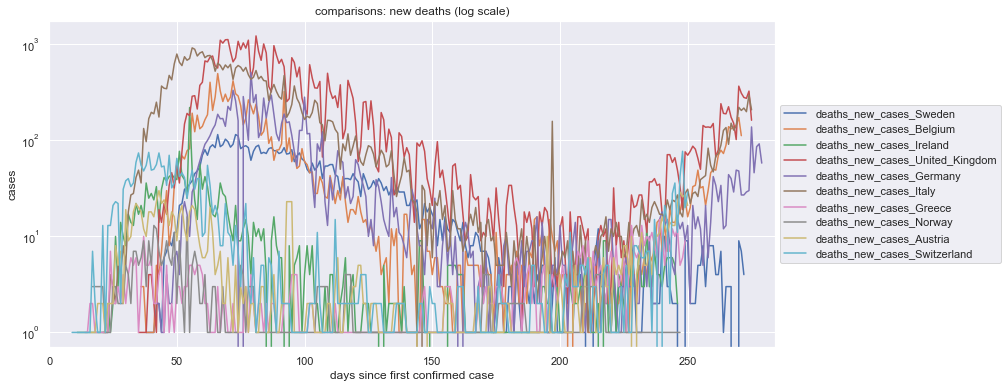

In [31]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
280                                 0.478085   
281                                 0.433939   
282                                 0.477544   
283                                 0.467730   
284                                 0.364182   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
280                                 NaN                                  NaN   
281                                 NaN                                  NaN   
282                                 NaN                                  NaN   
283                                 NaN                                  NaN   
284                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
280                                  NaN   
281                                  NaN   
282                                  NaN   
283                                  NaN   
284                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
280                                         NaN   
281                                         NaN   
282                                         NaN   
283                                         NaN   
284                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
280                                  NaN                                NaN   
281                                  NaN                                NaN   
282                                  NaN                                NaN   
283                                  NaN                                NaN   
284                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
280                                           0.892658      
281                                           0.999513      
282                                           1.110360      
283                                           0.985443      
284                                           0.805770      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
280                                 NaN                                 NaN   
281                                 NaN                                 NaN   
282                                 NaN                                 NaN   
283                                 NaN                                 NaN   
284                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
280                                  NaN   
281                                  NaN   
282                                  NaN   
283                                  NaN   
284                                  NaN   

     confirmed_percentage_change_Switzerland  \
280                                      NaN   
281                                      NaN   
282                                      NaN   
283                                      NaN   
284                                      NaN   

     confirmed_percentage_change_Mongolia  \
280                                   NaN   
281                                   NaN   
282                                   NaN   
283                                   NaN   
284                                   NaN   

     confirmed_percentage_change_South_Africa  
280                                       NaN  
281                                       NaN  
282                                       NaN  
283                                       NaN  
284                                       NaN

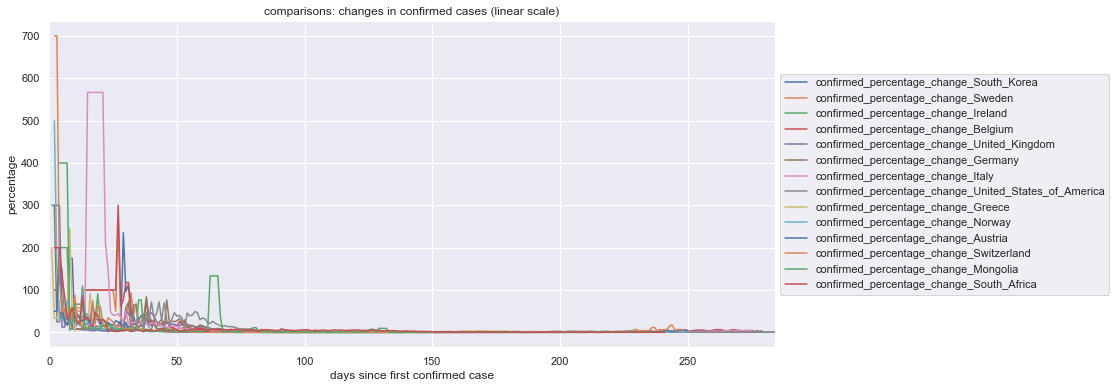

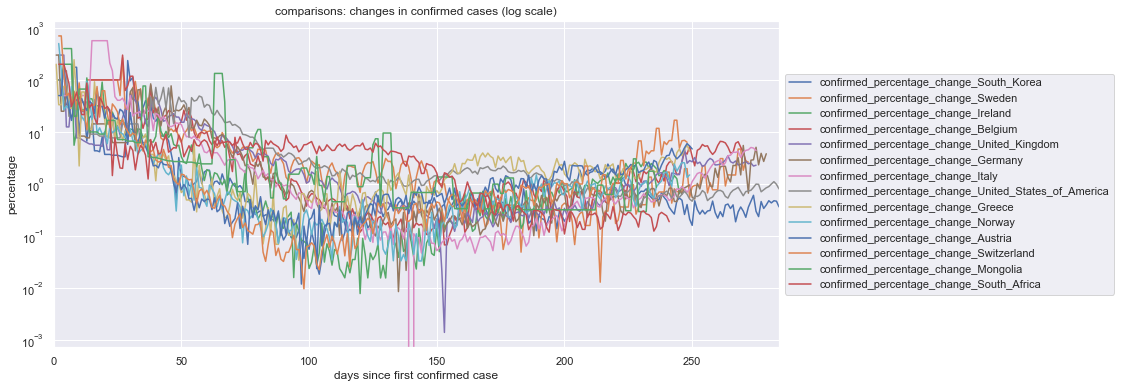

In [32]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia',
    'confirmed_percentage_change_South_Africa']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
280                              0.216920                              NaN   
281                              0.216450                              NaN   
282                              0.215983                              NaN   
283                              0.431034                              NaN   
284                              0.429185                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
280                               NaN                               NaN   
281                               NaN                               NaN   
282                               NaN                               NaN   
283                               NaN                               NaN   
284                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
280                                      NaN   
281                                      NaN   
282                                      NaN   
283                                      NaN   
284                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
280                               NaN                             NaN   
281                               NaN                             NaN   
282                               NaN                             NaN   
283                               NaN                             NaN   
284                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
280                                           0.436267   
281                                           0.426466   
282                                           0.450458   
283                                           0.395322   
284                                           0.173899   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
280                              NaN                              NaN   
281                              NaN                              NaN   
282                              NaN                              NaN   
283                              NaN                              NaN   
284                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
280                               NaN                                   NaN   
281                               NaN                                   NaN   
282                               NaN                                   NaN   
283                               NaN                                   NaN   
284                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  deaths_percentage_change_South_Africa  
280                                NaN                                    NaN  
281                                NaN                                    NaN  
282                                NaN                                    NaN  
283                                NaN                                    NaN  
284                                NaN                                    NaN

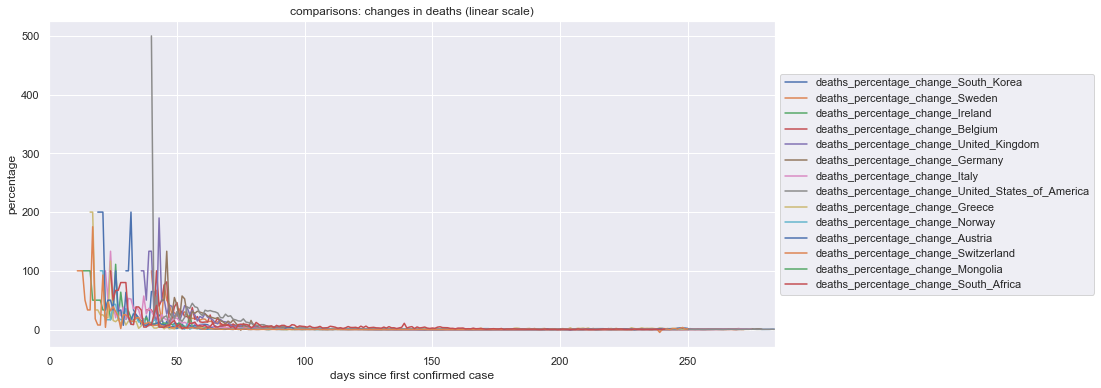

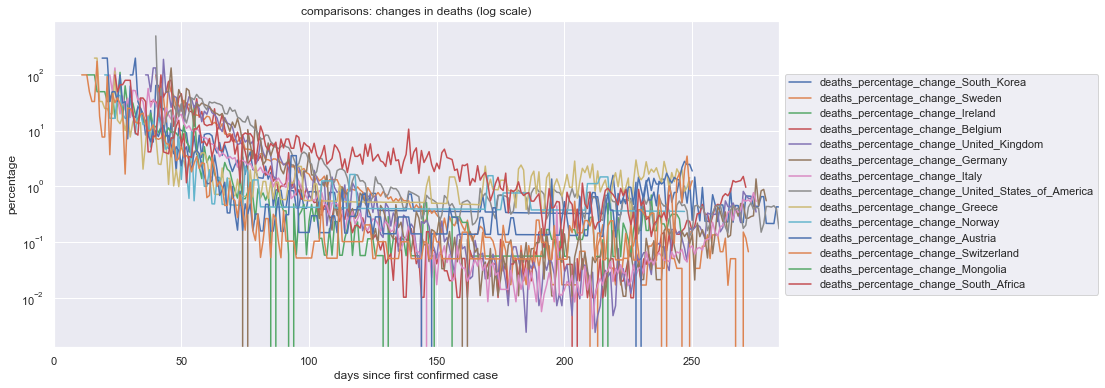

In [33]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia',
    'deaths_percentage_change_South_Africa']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
280                              NaN                               NaN   
281                              NaN                               NaN   
282                              NaN                               NaN   
283                              NaN                               NaN   
284                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
280                               NaN   
281                               NaN   
282                               NaN   
283                               NaN   
284                               NaN   

     deaths_percentage_change_United_Kingdom  \
280                                      NaN   
281                                      NaN   
282                                      NaN   
283                                      NaN   
284                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
280                               NaN                             NaN   
281                               NaN                             NaN   
282                               NaN                             NaN   
283                               NaN                             NaN   
284                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
280                              NaN                              NaN   
281                              NaN                              NaN   
282                              NaN                              NaN   
283                              NaN                              NaN   
284                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
280                               NaN                                   NaN  
281                               NaN                                   NaN  
282                               NaN                                   NaN  
283                               NaN                                   NaN  
284                               NaN                                   NaN

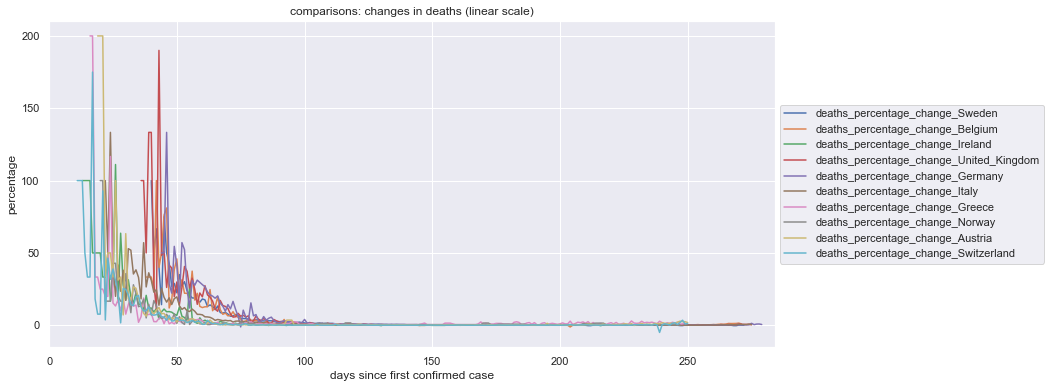

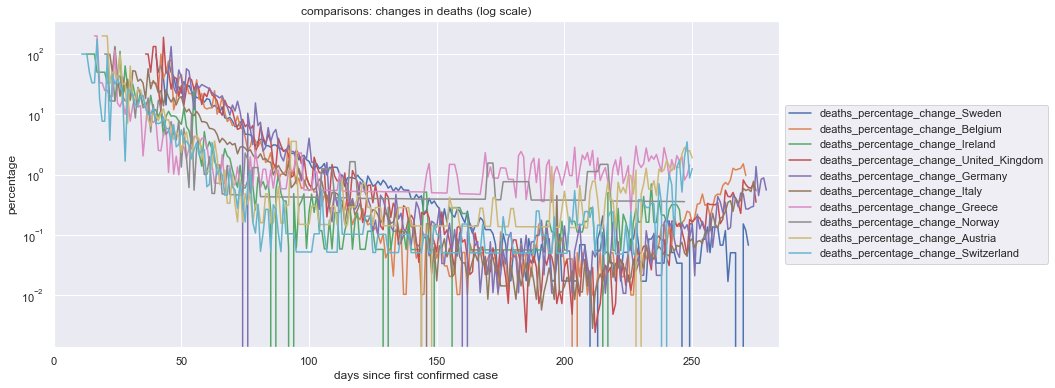

In [34]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');